In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
#from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import ExtraTreesRegressor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
sns.set_theme(style="darkgrid")

In [3]:
df=pd.read_csv("C:/Users/Prince kumar/Downloads/cars_engage_2022 (1).csv")

In [4]:
df.head()

Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1           1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2           2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3           3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4           4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   

   Cylinders  Valves_Per_Cylinder              Drivetrain  \
0        2.0                  2.0  RWD (Rear Wheel Drive)   
1        2.0                  2.0  RWD (Rear Wheel Drive)   
2        2.0                  2.0  RWD (Rear Wheel Drive)   
3        2.0                  2.0  RWD (Rear Wheel Drive)   
4        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration Emission_Norm   Engine_Location Fuel_System  \
0                In-line         BS IV  Rear, Transverse   Injection   
1                In-line         BS IV  Rear, Transverse   Injection   
2                In-line         BS IV  Rear, Transverse   Injection   
3                In-line         BS IV  Rear, Transverse   Injection   
4                In-line         BS IV  Rear, Transverse   Injection   

  Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors  \
0          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
1          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
2          15 litres       CNG  1652 mm  3164 mm  1750 mm  Hatchback    4.0   
3          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
4          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   

     City_Mileage Highway_Mileage ARAI_Certified_Mileage  \
0  ?23.6 km/litre             NaN          23.6 km/litre   
1  ?23.6 km/litre             NaN          23.6 km/litre   
2             NaN             NaN                    NaN   
3  ?23.6 km/litre             NaN          21.9 km/litre   
4  ?23.6 km/litre             NaN          23.6 km/litre   

  ARAI_Certified_Mileage_for_CNG Kerb_Weight Gears Ground_Clearance  \
0                            NaN      660 kg     4           180 mm   
1                            NaN      725 kg     4           180 mm   
2                       36 km/kg      710 kg     4           180 mm   
3                            NaN      725 kg     5           180 mm   
4                            NaN      725 kg     4           180 mm   

  Front_Brakes Rear_Brakes                                   Front_Suspension  \
0         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
1         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
2         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
3         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
4         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension Front_Track Rear_Track  \
0  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
1  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
2  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
3  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
4  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   

  Front_Tyre_&_Rim Rear_Tyre_&_Rim  Power_Steering       Power_Windows  \
0        135/70R12       155/65R12  Electric Power  Only Front Windows   
1        135/70R12       155/65R12             NaN                 NaN   
2        135/70R12       155/65R12  Electric Power                 NaN   
3        135/70R12       155/65R12  Electric Power  Only Front Windows   
4        135/70R12       155/65R12  Electric Power                 NaN   

  Power_Seats Keyless_Entry         Power        Torque Odometer Speedometer  \
0       

In [5]:
# Basic understanding of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

Unnamed: 0                                      0
Make                                           75
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                   12
Cylinders                                      66
Valves_Per_Cylinder                           102
Drivetrain                                      7
Cylinder_Configuration                         13
Emission_Norm                                  11
Engine_Location                                43
Fuel_System                                     8
Fuel_Tank_Capacity                             69
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           4


In [7]:
df.shape

(1276, 141)

#Drop irrelvant columns

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)


In [9]:
df.dtypes

Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     object
Doors                                        f

In [10]:
#Fatching The columns name
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

In [11]:
df.isna().sum()

Make                                           75
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                   12
Cylinders                                      66
Valves_Per_Cylinder                           102
Drivetrain                                      7
Cylinder_Configuration                         13
Emission_Norm                                  11
Engine_Location                                43
Fuel_System                                     8
Fuel_Tank_Capacity                             69
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           4
City_Mileage                                  555


In [12]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print(i,"----------",df[i].isna().sum()*100/df.shape[0])

Make ---------- 5.877742946708464
Displacement ---------- 0.9404388714733543
Cylinders ---------- 5.172413793103448
Valves_Per_Cylinder ---------- 7.993730407523511
Drivetrain ---------- 0.54858934169279
Cylinder_Configuration ---------- 1.0188087774294672
Emission_Norm ---------- 0.8620689655172413
Engine_Location ---------- 3.3699059561128526
Fuel_System ---------- 0.6269592476489029
Fuel_Tank_Capacity ---------- 5.407523510971787
Height ---------- 0.07836990595611286
Width ---------- 0.9404388714733543
Body_Type ---------- 0.4702194357366771
Doors ---------- 0.31347962382445144
City_Mileage ---------- 43.495297805642636
Highway_Mileage ---------- 62.69592476489028
ARAI_Certified_Mileage ---------- 8.934169278996865
ARAI_Certified_Mileage_for_CNG ---------- 97.88401253918495
Kerb_Weight ---------- 28.605015673981192
Gears ---------- 8.22884012539185
Ground_Clearance ---------- 22.648902821316614
Front_Brakes ---------- 1.9592476489028212
Rear_Brakes ---------- 1.9592476489028212
Fron

In [13]:
#delete the missing value is more than 70 Percantage
for i in df.columns:
    if df[i].isna().sum()*100/df.shape[0]>70:
        df.drop(columns=[i],inplace=True)

In [14]:
df.head()

Make      Model  Variant Ex-Showroom_Price Displacement  Cylinders  \
0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc        2.0   
1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc        2.0   
2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc        2.0   
3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc        2.0   
4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RWD (Rear Wheel Drive)                In-line   
1                  2.0  RWD (Rear Wheel Drive)                In-line   
2                  2.0  RWD (Rear Wheel Drive)                In-line   
3                  2.0  RWD (Rear Wheel Drive)                In-line   
4                  2.0  RWD (Rear Wheel Drive)                In-line   

  Emission_Norm   Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type  \
0         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
1         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
2         BS IV  Rear, Transverse   Injection          15 litres       CNG   
3         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
4         BS IV  Rear, Transverse   Injection          24 litres    Petrol   

    Height   Length    Width  Body_Type  Doors    City_Mileage  \
0  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre   
1  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre   
2  1652 mm  3164 mm  1750 mm  Hatchback    4.0             NaN   
3  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre   
4  1652 mm  3164 mm  1750 mm  Hatchback    5.0  ?23.6 km/litre   

  Highway_Mileage ARAI_Certified_Mileage Kerb_Weight Gears Ground_Clearance  \
0             NaN          23.6 km/litre      660 kg     4           180 mm   
1             NaN          23.6 km/litre      725 kg     4           180 mm   
2             NaN                    NaN      710 kg     4           180 mm   
3             NaN          21.9 km/litre      725 kg     5           180 mm   
4             NaN          23.6 km/litre      725 kg     4           180 mm   

  Front_Brakes Rear_Brakes                                   Front_Suspension  \
0         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
1         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
2         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
3         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
4         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension Front_Track Rear_Track  \
0  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
1  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
2  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
3  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
4  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   

  Front_Tyre_&_Rim Rear_Tyre_&_Rim  Power_Steering       Power_Windows  \
0        135/70R12       155/65R12  Electric Power  Only Front Windows   
1        135/70R12       155/65R12             NaN                 NaN   
2        135/70R12       155/65R12  Electric Power                 NaN   
3        135/70R12       155/65R12  Electric Power  Only Front Windows   
4        135/70R12       155/65R12  Electric Power                 NaN   

  Power_Seats Keyless_Entry         Power        Torque Odometer Speedometer  \
0         NaN        Remote  38PS@5500rpm  51Nm@4000rpm  Digital      Analog   
1         NaN           NaN  38PS@5500rpm  51Nm@4000rpm  Digital      Analog   
2         NaN           NaN  38PS@5500rpm  51Nm@4000rpm  Digital      Analog   
3         NaN        Remote  38PS@5500rpm  51Nm@4000rpm  

In [15]:
df.shape

(1276, 115)

In [16]:
a=[]
b=[]
# divide the data object and numerical 
for i in df:
    if df[i].dtype=="object":
        a.append(df[i])
    else:
        b.append(df[i])

In [17]:
numeric=["int32","float64"]
df_num=df.select_dtypes(include=numeric)

In [18]:
df_num

Cylinders  Valves_Per_Cylinder  Doors  Seating_Capacity  \
0           2.0                  2.0    5.0               4.0   
1           2.0                  2.0    5.0               4.0   
2           2.0                  2.0    4.0               4.0   
3           2.0                  2.0    5.0               4.0   
4           2.0                  2.0    5.0               4.0   
...         ...                  ...    ...               ...   
1271        4.0                  4.0    4.0               5.0   
1272        4.0                  4.0    4.0               5.0   
1273        4.0                  4.0    4.0               5.0   
1274        4.0                  4.0    4.0               5.0   
1275        4.0                  4.0    5.0               7.0   

      Number_of_Airbags  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
1271                2.0  
1272                6.0  
1273                6.0  
1274                2.0  
1275                6.0  

[1276 rows x 5 columns]

In [19]:
df_ob=df.select_dtypes(include="object")

In [20]:
df_num.isna().sum()

Cylinders               66
Valves_Per_Cylinder    102
Doors                    4
Seating_Capacity         6
Number_of_Airbags      135
dtype: int64

In [21]:
# for i in df_num:
#     if df_num[i].isna().sum()>0:
#         df_num[i].fillna(df_num[i].mean(),inplace=True)

In [22]:
df_num.head()

Cylinders  Valves_Per_Cylinder  Doors  Seating_Capacity  Number_of_Airbags
0        2.0                  2.0    5.0               4.0                NaN
1        2.0                  2.0    5.0               4.0                NaN
2        2.0                  2.0    4.0               4.0                NaN
3        2.0                  2.0    5.0               4.0                NaN
4        2.0                  2.0    5.0               4.0                NaN

In [23]:
df_num.isna().sum()

Cylinders               66
Valves_Per_Cylinder    102
Doors                    4
Seating_Capacity         6
Number_of_Airbags      135
dtype: int64

In [24]:
# Misssing value cleaned

df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage','Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control']
len(df_obj_list)

45

In [25]:
# Selecting the best features of columns that is object
df_ob=df_ob.loc[0:,df_obj_list]

In [26]:
df_ob.head()

Make      Model  Variant Ex-Showroom_Price Displacement  \
0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   

               Drivetrain Emission_Norm Keyless_Entry         Power  \
0  RWD (Rear Wheel Drive)         BS IV        Remote  38PS@5500rpm   
1  RWD (Rear Wheel Drive)         BS IV           NaN  38PS@5500rpm   
2  RWD (Rear Wheel Drive)         BS IV           NaN  38PS@5500rpm   
3  RWD (Rear Wheel Drive)         BS IV        Remote  38PS@5500rpm   
4  RWD (Rear Wheel Drive)         BS IV           NaN  38PS@5500rpm   

         Torque Odometer Speedometer    Tachometer Tripmeter Fuel_Type  \
0  51Nm@4000rpm  Digital      Analog  Not on offer       Yes    Petrol   
1  51Nm@4000rpm  Digital      Analog  Not on offer       Yes    Petrol   
2  51Nm@4000rpm  Digital      Analog  Not on offer       Yes       CNG   
3  51Nm@4000rpm  Digital      Analog  Not on offer       Yes    Petrol   
4  51Nm@4000rpm  Digital      Analog  Not on offer       Yes    Petrol   

  ARAI_Certified_Mileage                                   Front_Suspension  \
0          23.6 km/litre  Independent, Lower Wishbone, McPherson Strut w...   
1          23.6 km/litre  Independent, Lower Wishbone, McPherson Strut w...   
2                    NaN  Independent, Lower Wishbone, McPherson Strut w...   
3          21.9 km/litre  Independent, Lower Wishbone, McPherson Strut w...   
4          23.6 km/litre  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension Ground_Clearance  \
0  Independent, Semi Trailing arm with coil sprin...           180 mm   
1  Independent, Semi Trailing arm with coil sprin...           180 mm   
2  Independent, Semi Trailing arm with coil sprin...           180 mm   
3  Independent, Semi Trailing arm with coil sprin...           180 mm   
4  Independent, Semi Trailing arm with coil sprin...           180 mm   

   Boot_Space                  Audiosystem Third_Row_AC_Vents  \
0  110 litres  CD Player with USB & Aux-in     Not Applicable   
1  110 litres                 Not on offer     Not Applicable   
2  110 litres                 Not on offer     Not Applicable   
3   94 litres  CD Player with USB & Aux-in     Not Applicable   
4  110 litres                 Not on offer     Not Applicable   

                                 Ventilation_System  \
0  Manual Air conditioning with cooling and heating   
1                                               NaN   
2                Air Conditioning with cooling only   
3  Manual Air conditioning with cooling and heating   
4                Air Conditioning with cooling only   

  Auto-Dimming_Rear-View_Mirror Hill_Assist Gear_Indicator  \
0                           NaN         NaN            NaN   
1                           NaN         NaN            NaN   
2                           Yes         Yes            NaN   
3                           NaN         NaN            Yes   
4                           NaN         NaN            NaN   

  ABS_(Anti-lock_Braking_System) EBD_(Electronic_Brake-force_Distribution)  \
0                            NaN                                       NaN   
1                            NaN                                       NaN   
2                            NaN                                       NaN   
3                            NaN                                       NaN   
4                            NaN                                       NaN   

  Gear_Shift_Reminder Adjustable_Steering_Column Parking_Assistance  \
0                 NaN                        NaN                NaN   
1                 NaN                        NaN                NaN   
2                 NaN                        NaN                NaN

In [27]:
df_ob.shape

(1276, 45)

In [28]:
df_ob.isna().sum()

Make                                          75
Model                                          0
Variant                                        0
Ex-Showroom_Price                              0
Displacement                                  12
Drivetrain                                     7
Emission_Norm                                 11
Keyless_Entry                                274
Power                                          0
Torque                                         2
Odometer                                      43
Speedometer                                   45
Tachometer                                    13
Tripmeter                                     60
Fuel_Type                                      0
ARAI_Certified_Mileage                       114
Front_Suspension                              59
Rear_Suspension                               46
Ground_Clearance                             289
Boot_Space                                   249
Audiosystem         

In [29]:
df_ob['Make'].nunique()

39

In [30]:
df_ob['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [31]:
df_ob['Model'].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

In [32]:
df_ob['Model'].nunique()

263

In [33]:
x=df_ob[df_ob["Model"]=="Wagon"]

In [34]:
# MAruti Suzuki r -Maruti suzuki
# land rover -  Land Rover Rover

In [35]:
y=df_ob[df_ob["Model"]=="Land Rover Rover"]
y

Empty DataFrame
Columns: [Make, Model, Variant, Ex-Showroom_Price, Displacement, Drivetrain, Emission_Norm, Keyless_Entry, Power, Torque, Odometer, Speedometer, Tachometer, Tripmeter, Fuel_Type, ARAI_Certified_Mileage, Front_Suspension, Rear_Suspension, Ground_Clearance, Boot_Space, Audiosystem, Third_Row_AC_Vents, Ventilation_System, Auto-Dimming_Rear-View_Mirror, Hill_Assist, Gear_Indicator, ABS_(Anti-lock_Braking_System), EBD_(Electronic_Brake-force_Distribution), Gear_Shift_Reminder, Adjustable_Steering_Column, Parking_Assistance, Key_Off_Reminder, USB_Compatibility, EBA_(Electronic_Brake_Assist), Seat_Height_Adjustment, Navigation_System, Second_Row_AC_Vents, Rear_Center_Armrest, ESP_(Electronic_Stability_Program), Cooled_Glove_Box, Turbocharger, Rain_Sensing_Wipers, Automatic_Headlamps, ASR_/_Traction_Control, Cruise_Control]
Index: []

In [36]:
df_ob["Make"]=df_ob["Make"].replace("Maruti Suzuki R","Maruti Suzuki")
df_ob["Make"]=df_ob["Make"].replace("Land Rover Rover","Land Rover")

In [37]:
df_ob['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia', 'Mitsubishi'],
      dtype=object)

In [38]:
df_ob["Make"].nunique()

37

In [39]:
df_ob['Model']=df_ob['Model'].replace("Range","Range Rover")
df_ob["Model"]=df_ob["Model"].replace("Wagon","Wagon R")

In [40]:
df_ob["Model"].nunique()

263

In [41]:
df_ob["Model"].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

In [42]:
df_ob.head()

Make      Model  Variant Ex-Showroom_Price Displacement  \
0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   

               Drivetrain Emission_Norm Keyless_Entry         Power  \
0  RWD (Rear Wheel Drive)         BS IV        Remote  38PS@5500rpm   
1  RWD (Rear Wheel Drive)         BS IV           NaN  38PS@5500rpm   
2  RWD (Rear Wheel Drive)         BS IV           NaN  38PS@5500rpm   
3  RWD (Rear Wheel Drive)         BS IV        Remote  38PS@5500rpm   
4  RWD (Rear Wheel Drive)         BS IV           NaN  38PS@5500rpm   

         Torque Odometer Speedometer    Tachometer Tripmeter Fuel_Type  \
0  51Nm@4000rpm  Digital      Analog  Not on offer       Yes    Petrol   
1  51Nm@4000rpm  Digital      Analog  Not on offer       Yes    Petrol   
2  51Nm@4000rpm  Digital      Analog  Not on offer       Yes       CNG   
3  51Nm@4000rpm  Digital      Analog  Not on offer       Yes    Petrol   
4  51Nm@4000rpm  Digital      Analog  Not on offer       Yes    Petrol   

  ARAI_Certified_Mileage                                   Front_Suspension  \
0          23.6 km/litre  Independent, Lower Wishbone, McPherson Strut w...   
1          23.6 km/litre  Independent, Lower Wishbone, McPherson Strut w...   
2                    NaN  Independent, Lower Wishbone, McPherson Strut w...   
3          21.9 km/litre  Independent, Lower Wishbone, McPherson Strut w...   
4          23.6 km/litre  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension Ground_Clearance  \
0  Independent, Semi Trailing arm with coil sprin...           180 mm   
1  Independent, Semi Trailing arm with coil sprin...           180 mm   
2  Independent, Semi Trailing arm with coil sprin...           180 mm   
3  Independent, Semi Trailing arm with coil sprin...           180 mm   
4  Independent, Semi Trailing arm with coil sprin...           180 mm   

   Boot_Space                  Audiosystem Third_Row_AC_Vents  \
0  110 litres  CD Player with USB & Aux-in     Not Applicable   
1  110 litres                 Not on offer     Not Applicable   
2  110 litres                 Not on offer     Not Applicable   
3   94 litres  CD Player with USB & Aux-in     Not Applicable   
4  110 litres                 Not on offer     Not Applicable   

                                 Ventilation_System  \
0  Manual Air conditioning with cooling and heating   
1                                               NaN   
2                Air Conditioning with cooling only   
3  Manual Air conditioning with cooling and heating   
4                Air Conditioning with cooling only   

  Auto-Dimming_Rear-View_Mirror Hill_Assist Gear_Indicator  \
0                           NaN         NaN            NaN   
1                           NaN         NaN            NaN   
2                           Yes         Yes            NaN   
3                           NaN         NaN            Yes   
4                           NaN         NaN            NaN   

  ABS_(Anti-lock_Braking_System) EBD_(Electronic_Brake-force_Distribution)  \
0                            NaN                                       NaN   
1                            NaN                                       NaN   
2                            NaN                                       NaN   
3                            NaN                                       NaN   
4                            NaN                                       NaN   

  Gear_Shift_Reminder Adjustable_Steering_Column Parking_Assistance  \
0                 NaN                        NaN                NaN   
1                 NaN                        NaN                NaN   
2                 NaN                        NaN                NaN

In [43]:
pd.set_option("display.max_rows",None)
df_ob[['Make','Model']]

Make                              Model
0              Tata                          Nano Genx
1              Tata                          Nano Genx
2              Tata                          Nano Genx
3              Tata                          Nano Genx
4              Tata                          Nano Genx
5              Tata                          Nano Genx
6            Datsun                            Redi-Go
7            Datsun                            Redi-Go
8            Datsun                            Redi-Go
9            Datsun                            Redi-Go
10           Datsun                            Redi-Go
11           Datsun                            Redi-Go
12          Renault                               Kwid
13          Renault                               Kwid
14          Renault                               Kwid
15          Renault                               Kwid
16          Renault                               Kwid
17          Renault                               Kwid
18          Renault                               Kwid
19          Renault                               Kwid
20          Renault                               Kwid
21          Renault                               Kwid
22          Renault                               Kwid
23          Renault                               Kwid
24    Maruti Suzuki                               Eeco
25    Maruti Suzuki                               Eeco
26    Maruti Suzuki                               Eeco
27    Maruti Suzuki                               Eeco
28    Maruti Suzuki                               Eeco
29    Maruti Suzuki                           Alto K10
30    Maruti Suzuki                           Alto K10
31    Maruti Suzuki                           Alto K10
32    Maruti Suzuki                           Alto K10
33    Maruti Suzuki                           Alto K10
34    Maruti Suzuki                           Alto K10
35           Datsun                                 Go
36           Datsun                                 Go
37           Datsun                                 Go
38           Datsun                                 Go
39           Datsun                                 Go
40           Datsun                                 Go
41           Datsun                                 Go
42           Datsun                                 Go
43           Datsun                                 Go
44    Maruti Suzuki                       Celerio Tour
45    Maruti Suzuki                       Celerio Tour
46          Hyundai                             Santro
47          Hyundai                             Santro
48          Hyundai                             Santro
49          Hyundai                             Santro
50          Hyundai                             Santro
51          Hyundai                             Santro
52          Hyundai                             Santro
53          Hyundai                             Santro
54             Tata                              Tiago
55             Tata                              Tiago
56             Tata                              Tiago
57             Tata                              Tiago
58             Tata                              Tiago
59             Tata                              Tiago
60             Tata                              Tiago
61             Tata                              Tiago
62    Maruti Suzuki                          Celerio X
63    Maruti Suzuki                          Celerio X
64    Maruti Suzuki                          Celerio X
65    Maruti Suzuki                          Celerio X
66    Maruti Suzuki                          Celerio X
67    Maruti Suzuki                          Celerio X
68    Maruti Suzuki                          Celerio X
69    Maruti Suzuki                          Celerio X
70    Maruti Suzuki                              Ignis
71    Maruti Suzuki                              Ignis


In [44]:
df_ob["Make"] =df_ob['Make'].combine_first(df_ob['Model'])
df_ob['Make'].head()

0    Tata
1    Tata
2    Tata
3    Tata
4    Tata
Name: Make, dtype: object

In [45]:
df_ob['Make'].isna().sum()

0

In [46]:
for i in df_ob['Make']:
    if "Mercedes" in i:
        df_ob['Make']=df_ob['Make'].replace(i,"Mercedes-Benz")
    elif "Rolls" in i:
        df_ob['Make']=df_ob['Make'].replace(i,"Rolls-Royce")
    elif "Go" in i:
        df_ob['Make']=df_ob['Make'].replace(i,"Datsun")

In [47]:
df_ob['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Mitsubishi'], dtype=object)

In [48]:
df_ob['Make'].nunique()

39

# Model columns

In [49]:
# There is no Null value
df_ob['Model'].isna().sum()

0

In [50]:
df_ob.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Drivetrain', 'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque',
       'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Cont

In [51]:
df_ob['Ex-Showroom_Price'].isna().sum()

0

In [52]:
df_ob['Ex-Showroom_Price'].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)

In [53]:
df_ob['Ex-Showroom_Price'].nunique()

1179

In [54]:
df_ob['Ex-Showroom_Price']=df_ob['Ex-Showroom_Price'].str.replace("Rs.","").str.replace(",","")


C:\Users\Prince kumar\AppData\Local\Temp\ipykernel_10236\2730389166.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ob['Ex-Showroom_Price']=df_ob['Ex-Showroom_Price'].str.replace("Rs.","").str.replace(",","")


In [55]:
df_ob['Ex-Showroom_Price'].unique()

array([' 292667', ' 236447', ' 296661', ..., ' 1431000', ' 1201000',
       ' 6862560'], dtype=object)

In [56]:
df_ob.rename(columns={"Ex-Showroom_Price":"Price"},inplace=True)

In [57]:
df_ob.columns

Index(['Make', 'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
     

In [58]:
df_ob.head()

Make      Model  Variant    Price Displacement              Drivetrain  \
0  Tata  Nano Genx       Xt   292667       624 cc  RWD (Rear Wheel Drive)   
1  Tata  Nano Genx       Xe   236447       624 cc  RWD (Rear Wheel Drive)   
2  Tata  Nano Genx  Emax Xm   296661       624 cc  RWD (Rear Wheel Drive)   
3  Tata  Nano Genx      Xta   334768       624 cc  RWD (Rear Wheel Drive)   
4  Tata  Nano Genx       Xm   272223       624 cc  RWD (Rear Wheel Drive)   

  Emission_Norm Keyless_Entry         Power        Torque Odometer  \
0         BS IV        Remote  38PS@5500rpm  51Nm@4000rpm  Digital   
1         BS IV           NaN  38PS@5500rpm  51Nm@4000rpm  Digital   
2         BS IV           NaN  38PS@5500rpm  51Nm@4000rpm  Digital   
3         BS IV        Remote  38PS@5500rpm  51Nm@4000rpm  Digital   
4         BS IV           NaN  38PS@5500rpm  51Nm@4000rpm  Digital   

  Speedometer    Tachometer Tripmeter Fuel_Type ARAI_Certified_Mileage  \
0      Analog  Not on offer       Yes    Petrol          23.6 km/litre   
1      Analog  Not on offer       Yes    Petrol          23.6 km/litre   
2      Analog  Not on offer       Yes       CNG                    NaN   
3      Analog  Not on offer       Yes    Petrol          21.9 km/litre   
4      Analog  Not on offer       Yes    Petrol          23.6 km/litre   

                                    Front_Suspension  \
0  Independent, Lower Wishbone, McPherson Strut w...   
1  Independent, Lower Wishbone, McPherson Strut w...   
2  Independent, Lower Wishbone, McPherson Strut w...   
3  Independent, Lower Wishbone, McPherson Strut w...   
4  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension Ground_Clearance  \
0  Independent, Semi Trailing arm with coil sprin...           180 mm   
1  Independent, Semi Trailing arm with coil sprin...           180 mm   
2  Independent, Semi Trailing arm with coil sprin...           180 mm   
3  Independent, Semi Trailing arm with coil sprin...           180 mm   
4  Independent, Semi Trailing arm with coil sprin...           180 mm   

   Boot_Space                  Audiosystem Third_Row_AC_Vents  \
0  110 litres  CD Player with USB & Aux-in     Not Applicable   
1  110 litres                 Not on offer     Not Applicable   
2  110 litres                 Not on offer     Not Applicable   
3   94 litres  CD Player with USB & Aux-in     Not Applicable   
4  110 litres                 Not on offer     Not Applicable   

                                 Ventilation_System  \
0  Manual Air conditioning with cooling and heating   
1                                               NaN   
2                Air Conditioning with cooling only   
3  Manual Air conditioning with cooling and heating   
4                Air Conditioning with cooling only   

  Auto-Dimming_Rear-View_Mirror Hill_Assist Gear_Indicator  \
0                           NaN         NaN            NaN   
1                           NaN         NaN            NaN   
2                           Yes         Yes            NaN   
3                           NaN         NaN            Yes   
4                           NaN         NaN            NaN   

  ABS_(Anti-lock_Braking_System) EBD_(Electronic_Brake-force_Distribution)  \
0                            NaN                                       NaN   
1                            NaN                                       NaN   
2                            NaN                                       NaN   
3                            NaN                                       NaN   
4                            NaN                                       NaN   

  Gear_Shift_Reminder Adjustable_Steering_Column Parking_Assistance  \
0                 NaN                        NaN                NaN   
1                 NaN                        NaN                NaN   
2                 NaN                        NaN                NaN   
3                 NaN                        NaN  

# Handle Displacement

In [59]:
df_ob["Displacement"].unique()

array(['624 cc', '799 cc', '999 cc', '1196 cc', '998 cc', '1198 cc',
       '1086 cc', '1199 cc', '1197 cc', '1173 cc', '1489 cc', '1248 cc',
       '1364 cc', '1193 cc', '1396 cc', '1186 cc', '1498 cc', '1194 cc',
       '1496 cc', '1461 cc', '1368 cc', '1956 cc', '2999 cc', '2157 cc',
       '1968 cc', '1997 cc', '1597 cc', '1798 cc', '1395 cc', '1595 cc',
       '2143 cc', '1991 cc', '2000 cc', '1998 cc', '1969 cc', '1999 cc',
       '1984 cc', '1995 cc', '2995 cc', '2993 cc', '2998 cc', '4951 cc',
       '2987 cc', '6417 cc', '3604 cc', '2996 cc', '2979 cc', '1988 cc',
       '5461 cc', '2982 cc', '3456 cc', '2894 cc', '6592 cc', '3982 cc',
       '2925 cc', '4691 cc', '5980 cc', '4663 cc', '3996 cc', '4461 cc',
       '5204 cc', '5998 cc', '3855 cc', '5950 cc', '5198 cc', '4497 cc',
       '6593 cc', '6752 cc', '6750 cc', '6749 cc', '7993 cc', '216 cc',
       '796 cc', '1120 cc', '1497 cc', '1994 cc', '1298 cc', '1397 cc',
       '1493 cc', '2523 cc', '1591 cc', '1582 cc', '1598 

In [60]:
df_ob["Displacement"]=df_ob["Displacement"].str.replace("cc","").str.replace(" ","")
df_ob["Displacement"].unique()

array(['624', '799', '999', '1196', '998', '1198', '1086', '1199', '1197',
       '1173', '1489', '1248', '1364', '1193', '1396', '1186', '1498',
       '1194', '1496', '1461', '1368', '1956', '2999', '2157', '1968',
       '1997', '1597', '1798', '1395', '1595', '2143', '1991', '2000',
       '1998', '1969', '1999', '1984', '1995', '2995', '2993', '2998',
       '4951', '2987', '6417', '3604', '2996', '2979', '1988', '5461',
       '2982', '3456', '2894', '6592', '3982', '2925', '4691', '5980',
       '4663', '3996', '4461', '5204', '5998', '3855', '5950', '5198',
       '4497', '6593', '6752', '6750', '6749', '7993', '216', '796',
       '1120', '1497', '1994', '1298', '1397', '1493', '2523', '1591',
       '1582', '1598', nan, '2498', '2596', '2149', '1462', '2179', '72',
       '2393', '2694', '2755', '1799', '2199', '3198', '2198', '2400',
       '1950', '2967', '4999', '4367', '3993', '3902', '3900', '6262',
       '6498', '6598', '1172', '2489', '1353', '1500', '1596', '2487',
 

In [61]:
df_ob[df_ob["Displacement"]=="72"]

Make     Model Variant     Price Displacement  \
687  Mahindra  E Verito      D4   1293214           72   
688  Mahindra  E Verito      D2   1267208           72   
689  Mahindra  E Verito      D6   1303241           72   

                  Drivetrain Emission_Norm Keyless_Entry         Power  \
687  FWD (Front Wheel Drive)           NaN        Remote  41PS@3500RPM   
688  FWD (Front Wheel Drive)           NaN           NaN  41PS@3500RPM   
689  FWD (Front Wheel Drive)           NaN        Remote  41PS@3500RPM   

           Torque Odometer Speedometer Tachometer Tripmeter Fuel_Type  \
687  91Nm@3000rpm  Digital         Yes     Analog       Yes  Electric   
688  91Nm@3000rpm  Digital      Analog     Analog       Yes  Electric   
689  91Nm@3000rpm  Digital      Analog     Analog       Yes  Electric   

    ARAI_Certified_Mileage                    Front_Suspension  \
687                    NaN  Macpherson-type with wishbone link   
688                    NaN  Macpherson-type with wishbone link   
689                    NaN  Macpherson-type with wishbone link   

                                       Rear_Suspension Ground_Clearance  \
687  H-Section torsion beam with programmed deflect...              NaN   
688  H-Section torsion beam with programmed deflect...              NaN   
689  H-Section torsion beam with programmed deflect...              NaN   

     Boot_Space                          Audiosystem Third_Row_AC_Vents  \
687  510 litres  CD/MP3/DVD Player with USB & Aux-in                NaN   
688  510 litres                         Not on offer     Not Applicable   
689  510 litres          CD Player with USB & Aux-in     Not Applicable   

                                   Ventilation_System  \
687  Manual Air conditioning with cooling and heating   
688  Manual Air conditioning with cooling and heating   
689  Manual Air conditioning with cooling and heating   

    Auto-Dimming_Rear-View_Mirror Hill_Assist Gear_Indicator  \
687                           NaN         Yes            NaN   
688                           NaN         Yes            NaN   
689                           NaN         Yes            NaN   

    ABS_(Anti-lock_Braking_System) EBD_(Electronic_Brake-force_Distribution)  \
687                            NaN                                       NaN   
688                            NaN                                       NaN   
689                            NaN                                       NaN   

    Gear_Shift_Reminder Adjustable_Steering_Column Parking_Assistance  \
687                 NaN                        NaN                NaN   
688                 NaN                        NaN                NaN   
689                 NaN                        NaN                NaN   

    Key_Off_Reminder USB_Compatibility EBA_(Electronic_Brake_Assist)  \
687              NaN               Yes                           NaN   
688              NaN               NaN                           NaN   
689              Yes               Yes                           NaN   

    Seat_Height_Adjustment Navigation_System Second_Row_AC_Vents  \
687                    NaN               NaN                 NaN   
688                    NaN               NaN                 NaN   
689      Manual Adjustment               NaN                 NaN   

    Rear_Center_Armrest ESP_(Electronic_Stability_Program) Cooled_Glove_Box  \
687                 NaN                                NaN              NaN   
688                 NaN                                NaN              NaN   
689                 NaN                                NaN              NaN   

    Turbocharger Rain_Sensing_Wipers Automatic_Headlamps  \
687          NaN                 NaN                 NaN   
688          NaN                 NaN                 NaN   
689          NaN                 NaN                 NaN   

    ASR_/_Traction_Control Cruise_Control  
687                    NaN            NaN  
688        

In [62]:
df_ob.loc[687,"Displacement"]=1461
df_ob.loc[689,"Displacement"]=1461
df_ob.loc[688,"Displacement"]=1461

In [63]:
df_ob["Displacement"].unique()

array(['624', '799', '999', '1196', '998', '1198', '1086', '1199', '1197',
       '1173', '1489', '1248', '1364', '1193', '1396', '1186', '1498',
       '1194', '1496', '1461', '1368', '1956', '2999', '2157', '1968',
       '1997', '1597', '1798', '1395', '1595', '2143', '1991', '2000',
       '1998', '1969', '1999', '1984', '1995', '2995', '2993', '2998',
       '4951', '2987', '6417', '3604', '2996', '2979', '1988', '5461',
       '2982', '3456', '2894', '6592', '3982', '2925', '4691', '5980',
       '4663', '3996', '4461', '5204', '5998', '3855', '5950', '5198',
       '4497', '6593', '6752', '6750', '6749', '7993', '216', '796',
       '1120', '1497', '1994', '1298', '1397', '1493', '2523', '1591',
       '1582', '1598', nan, '2498', '2596', '2149', '1462', '2179', 1461,
       '2393', '2694', '2755', '1799', '2199', '3198', '2198', '2400',
       '1950', '2967', '4999', '4367', '3993', '3902', '3900', '6262',
       '6498', '6598', '1172', '2489', '1353', '1500', '1596', '2487',
 

In [64]:
## checking mode values of all columns of df_obj dataframe
for i in df_ob.columns:
    print(i,"----",df_ob[i].mode()[0])

Make ---- Maruti Suzuki
Model ---- Nexon
Variant ---- Lxi
Price ----  999900
Displacement ---- 1197
Drivetrain ---- FWD (Front Wheel Drive)
Emission_Norm ---- BS IV
Keyless_Entry ---- Smart Key
Power ---- 83PS@6000rpm
Torque ---- 200Nm@1750rpm
Odometer ---- Digital
Speedometer ---- Analog
Tachometer ---- Analog
Tripmeter ---- Yes
Fuel_Type ---- Petrol
ARAI_Certified_Mileage ---- 23 km/litre
Front_Suspension ---- MacPherson Strut
Rear_Suspension ---- Torsion Beam
Ground_Clearance ---- 165 mm
Boot_Space ---- 350 litres
Audiosystem ---- CD Player with USB & Aux-in
Third_Row_AC_Vents ---- Not Applicable
Ventilation_System ---- Fully automatic climate control
Auto-Dimming_Rear-View_Mirror ---- Yes
Hill_Assist ---- Yes
Gear_Indicator ---- Yes
ABS_(Anti-lock_Braking_System) ---- Yes
EBD_(Electronic_Brake-force_Distribution) ---- Yes
Gear_Shift_Reminder ---- Yes
Adjustable_Steering_Column ---- Rake, Reach
Parking_Assistance ---- Rear sensors with camera
Key_Off_Reminder ---- Yes
USB_Compatibil

In [65]:
df_ob.columns

Index(['Make', 'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
     

In [66]:
for i in df_ob.columns:
    print(i,"************\n\n",df_ob[i].unique(),"\n\n")

Make ************

 ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi'] 


Model ************

 ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Ca

In [67]:
### replace those features having yes or no values with no else with its mode value
for i in df_ob.columns:
    if df_ob[i].isna().sum()>0:
        if "Yes" in df_ob[i].unique():
            df_ob[i].fillna("not_defined",inplace = True)
        elif i in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
            df_ob[i].fillna("undefined",inplace=True)
        else:
            df_ob[i].fillna(df_ob[i].mode()[0],inplace=True)

In [68]:
df_ob.isna().sum()

Make                                         0
Model                                        0
Variant                                      0
Price                                        0
Displacement                                 0
Drivetrain                                   0
Emission_Norm                                0
Keyless_Entry                                0
Power                                        0
Torque                                       0
Odometer                                     0
Speedometer                                  0
Tachometer                                   0
Tripmeter                                    0
Fuel_Type                                    0
ARAI_Certified_Mileage                       0
Front_Suspension                             0
Rear_Suspension                              0
Ground_Clearance                             0
Boot_Space                                   0
Audiosystem                                  0
Third_Row_AC_

In [69]:
for i in df_ob.columns:
    print(i,"************\n\n",df_ob[i].unique(),"\n\n")

Make ************

 ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi'] 


Model ************

 ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Ca

#### From above output we can see there is a need to clean the following columns in order to use them appropriately for modelling 
- Power
- ARAI_Certified_Mileage
- Ground_Clearance
- Bootspace
- Torque

In [70]:
df_ob['Power'].isna().sum()

0

In [71]:
df_ob['Power'].unique()

array(['38PS@5500rpm', '54PS@5678rpm', '68PS@5500rpm', '73PS@6000rpm',
       '74PS@6000RPM', '62PS@6000rpm', '68PS@6000rpm', '68PS@6200rpm',
       '59PS@6000rpm', '68PS@5000rpm', '78PS@5000rpm', '59bhp@6000rpm',
       '69PS@5500rpm', '59PS@5500RPM', '86PS@6000rpm', '83PS@6000rpm',
       '72PS@62050rpm', '76.6PS@5800rpm', '64PS@4000rpm', '72PS@4000rpm',
       '80PS@5600rpm', '68PS@3800rpm', '75PS@4000rpm', '90PS@5000rpm',
       '81.8bhp@6000rpm', '70bhp@4000RPM', '71PS@4000rpm',
       '69bhp@6000rpm', '84PS@6000rpm', '90PS@4000rpm', '69PS@6000rpm',
       '100PS@6000rpm', '76PS@6200RPM', '90PS@4200rpm', '105PS@5000rpm',
       '110PS@4400rpm', '84.3PS@6000rpm', '100PS@3750RPM', '96PS@6500rpm',
       '100PS@3700RPM', '96PS@6300rpm', '90PS@5600rpm', '65PS@4000rpm',
       '93PS@4000RPM', '140ps@5500rpm', '89PS@6000 rpm', '82PS@6000 rpm',
       '90PS@6000rpm', '100PS@3600rpm', '89 bhp@6000rpm', '173PS@3750rpm',
       '177PS@3600rpm', '178bhp@400rpm', '178Bhp @ 4000', '141PS@4000r

In [72]:
df_ob["Power"]=df_ob["Power"].apply(lambda x:x[0:4])
df_ob["Power"].unique()

array(['38PS', '54PS', '68PS', '73PS', '74PS', '62PS', '59PS', '78PS',
       '59bh', '69PS', '86PS', '83PS', '72PS', '76.6', '64PS', '80PS',
       '75PS', '90PS', '81.8', '70bh', '71PS', '69bh', '84PS', '100P',
       '76PS', '105P', '110P', '84.3', '96PS', '65PS', '93PS', '140p',
       '89PS', '82PS', '89 b', '173P', '177P', '178b', '178B', '141P',
       '154P', '120P', '180P', '143P', '150P', '122P', '136P', '183P',
       '148b', '250P', '148h', '116P', '192P', '190b', '190P', '231h',
       '247P', '180p', '148 ', '245P', '248 ', '179P', '333P', '265H',
       '340H', '401P', '240P', '468 ', '286P', '334P', '410h', '300P',
       '258P', '557P', '262P', '450P', '265P', '340P', '609P', '275P',
       '350P', '430P', '585h', '289P', '460P', '299P', '630P', '453P',
       '550P', '261P', '455P', '610P', '650P', '590P', '560P', '608P',
       '605P', '563P', '570 ', '625P', '512P', '563@', '1479', '1600',
       '13bh', '12bh', '48PS', '47hp', '67PS', '77PS', '101.', '82hp',
      

In [73]:
#df_obj["Power"]=df_obj["Power"].apply(lambda x:x[0:4])
l1=[]
for i in df_ob["Power"]:
    s1=""
    for j in i:
        #if j=="u" and "n" and "d" and "e" and "f" and "i" and "n" and "e" and "d":
            #print(j)
            #s1="undefined"
        if j.isdigit() or j==".":
            s1=s1+j
    #print(s)
    l1.append(s1)
df_ob["Power"]=l1

In [74]:
df_ob['Power'].unique()

array(['38', '54', '68', '73', '74', '62', '59', '78', '69', '86', '83',
       '72', '76.6', '64', '80', '75', '90', '81.8', '70', '71', '84',
       '100', '76', '105', '110', '84.3', '96', '65', '93', '140', '89',
       '82', '173', '177', '178', '141', '154', '120', '180', '143',
       '150', '122', '136', '183', '148', '250', '116', '192', '190',
       '231', '247', '245', '248', '179', '333', '265', '340', '401',
       '240', '468', '286', '334', '410', '300', '258', '557', '262',
       '450', '609', '275', '350', '430', '585', '289', '460', '299',
       '630', '453', '550', '261', '455', '610', '650', '590', '560',
       '608', '605', '563', '570', '625', '512', '1479', '1600', '13',
       '12', '48', '47', '67', '77', '101.', '117', '118', '114', '63',
       '63.9', '123', '106', '85', '128', '109', '115', '25.8', '41.5',
       '119', '104', '121', '155', '41', '156', '166', '164', '174',
       '162', '163', '88.4', '142.', '200', '160', '187', '372', '181',
       '

In [75]:
df_ob["ARAI_Certified_Mileage"].isnull().sum()

0

In [76]:
df_ob["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', 'undefined', '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27

In [77]:
df_ob[df_ob["ARAI_Certified_Mileage"]=="1449 km/litre"]

Make                  Model   Variant     Price Displacement  \
1036  Mercedes-Benz  Mercedes-Benz C-Class  C 43 Amg   7500000         3982   

                  Drivetrain Emission_Norm Keyless_Entry Power         Torque  \
1036  RWD (Rear Wheel Drive)          BS 6     Smart Key   503  700Nm@1750RPM   

     Odometer Speedometer Tachometer Tripmeter Fuel_Type  \
1036  Digital      Analog     Analog       Yes    Petrol   

     ARAI_Certified_Mileage  \
1036          1449 km/litre   

                                       Front_Suspension  \
1036  AGILITY CONTROL suspension with selective damp...   

                                        Rear_Suspension Ground_Clearance  \
1036  AGILITY CONTROL suspension with selective damp...           112 mm   

      Boot_Space                          Audiosystem Third_Row_AC_Vents  \
1036  435 litres  CD/MP3/DVD Player with USB & Aux-in     Not Applicable   

          Ventilation_System Auto-Dimming_Rear-View_Mirror Hill_Assist  \
1036  2 Zone Climate Control                           Yes         Yes   

     Gear_Indicator ABS_(Anti-lock_Braking_System)  \
1036            Yes                            Yes   

     EBD_(Electronic_Brake-force_Distribution) Gear_Shift_Reminder  \
1036                                       Yes                 Yes   

     Adjustable_Steering_Column        Parking_Assistance Key_Off_Reminder  \
1036                Rake, Reach  Rear sensors with camera              Yes   

     USB_Compatibility EBA_(Electronic_Brake_Assist)  \
1036               Yes                           Yes   

               Seat_Height_Adjustment Navigation_System Second_Row_AC_Vents  \
1036  Electric Adjustment with Memory               Yes                 Yes   

     Rear_Center_Armrest ESP_(Electronic_Stability_Program) Cooled_Glove_Box  \
1036         Cup Holders                                Yes              Yes   

     Turbocharger Rain_Sensing_Wipers Automatic_Headlamps  \
1036          Yes                 Yes                 Yes   

     ASR_/_Traction_Control Cruise_Control  
1036                    Yes            Yes

In [78]:
df_ob.loc[1036,"ARAI_Certified_Mileage"]="14.49 km/litre"

In [79]:
df_ob["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', 'undefined', '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27

In [80]:
df_ob[df_ob['ARAI_Certified_Mileage']=="4 km/litre"]

Make        Model Variant      Price Displacement  \
1263  Bentley  Flying Spur      V8   34167064         3993   
1264  Bentley  Flying Spur     W12   39382083         5998   

                 Drivetrain Emission_Norm Keyless_Entry Power  \
1263  AWD (All Wheel Drive)         BS IV     Smart Key   507   
1264  AWD (All Wheel Drive)         BS IV     Smart Key   616   

                  Torque Odometer Speedometer Tachometer Tripmeter Fuel_Type  \
1263       660NM@1700rpm  Digital      Analog     Analog       Yes    Petrol   
1264  800Nm@1600-6100rpm  Digital      Analog     Analog       Yes    Petrol   

     ARAI_Certified_Mileage                            Front_Suspension  \
1263             4 km/litre  Air springs with continous damping control   
1264             4 km/litre  Air springs with continous damping control   

                                 Rear_Suspension Ground_Clearance  Boot_Space  \
1263  Air springs with continous damping control           142 mm  475 litres   
1264  Air springs with continous damping control           110 mm  475 litres   

                       Audiosystem Third_Row_AC_Vents  \
1263  DVD Player with USB & Aux-in     Not Applicable   
1264  DVD Player with USB & Aux-in     Not Applicable   

                   Ventilation_System Auto-Dimming_Rear-View_Mirror  \
1263  Fully automatic climate control                   not_defined   
1264  Fully automatic climate control                   not_defined   

     Hill_Assist Gear_Indicator ABS_(Anti-lock_Braking_System)  \
1263         Yes            Yes                            Yes   
1264         Yes            Yes                            Yes   

     EBD_(Electronic_Brake-force_Distribution) Gear_Shift_Reminder  \
1263                                       Yes                 Yes   
1264                                       Yes                 Yes   

     Adjustable_Steering_Column                  Parking_Assistance  \
1263                Rake, Reach  Front and rear sensors with camera   
1264                Rake, Reach  Front and rear sensors with camera   

     Key_Off_Reminder USB_Compatibility EBA_(Electronic_Brake_Assist)  \
1263              Yes               Yes                           Yes   
1264              Yes               Yes                           Yes   

               Seat_Height_Adjustment Navigation_System Second_Row_AC_Vents  \
1263  Electric Adjustment with Memory               Yes                 Yes   
1264  Electric Adjustment with Memory               Yes                 Yes   

     Rear_Center_Armrest ESP_(Electronic_Stability_Program) Cooled_Glove_Box  \
1263         Cup Holders                                Yes              Yes   
1264                 Yes                                Yes              Yes   

     Turbocharger Rain_Sensing_Wipers Automatic_Headlamps  \
1263          Yes                 Yes                 Yes   
1264          Yes                 Yes                 Yes   

     ASR_/_Traction_Control Cruise_Control  
1263                    Yes            Yes  
1264                    Yes            Yes

In [81]:
df_ob["ARAI_Certified_Mileage"]=df_ob["ARAI_Certified_Mileage"].str.replace(" km/litre","")
df_ob["ARAI_Certified_Mileage"].unique()

array(['23.6', 'undefined', '21.9', '25.17', '22.5', '23', '23.01',
       '24.04', '15', '24.07', '20.1', '23.1', '20.3', '24', '20.89',
       '20.5', '16', '23.7', '18.16', '23.59', '18.97', '19.49', '22.95',
       '17.57', '15.7', '20.14', '20', '28.4', '22', '18.6', '22.54',
       '18.15', '25.35', '20.4', '25.4', '18.78', '17.21', '19.91',
       '24.4', '19', '21.66', '21.73', '26.1', '19.4', '16.78', '17.71',
       '20.08', '17.1', '23.87', '21.01', '19.56', '18.2', '27.3', '16.3',
       '13.8', '12.35', '12.05', '17.06', '14.4', '19.5', '18.3', '13.7',
       '18.19', '20.38', '19.2', '14.81', '15.04', '17.9', '10', '15.73',
       '16.9', '21.15', '14.59', '16.47', '11', '13.12', '19.33', '14.11',
       '18.56', '13.57', '13.38', '11.24', '13', '12.8', '8.61',
       '9.8-10.0', '7.4', '11.6', '12', '11.13', '18', '10.8', '17.66',
       '11.86', '7.96', '13.5', '7.8', '14', '7.9', '10.63', '6.71',
       '8.6', '9', '8.77', '17.3', '7.29', '10.2', '9.5', '22.4-21.9',
  

In [82]:
### first fetch 4 characters from it 
df_ob["ARAI_Certified_Mileage"]=df_ob["ARAI_Certified_Mileage"].str.replace("-21.9","").str.replace("kmpl","")
df_ob["ARAI_Certified_Mileage"].unique()

C:\Users\Prince kumar\AppData\Local\Temp\ipykernel_10236\2791468914.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ob["ARAI_Certified_Mileage"]=df_ob["ARAI_Certified_Mileage"].str.replace("-21.9","").str.replace("kmpl","")


array(['23.6', 'undefined', '21.9', '25.17', '22.5', '23', '23.01',
       '24.04', '15', '24.07', '20.1', '23.1', '20.3', '24', '20.89',
       '20.5', '16', '23.7', '18.16', '23.59', '18.97', '19.49', '22.95',
       '17.57', '15.7', '20.14', '20', '28.4', '22', '18.6', '22.54',
       '18.15', '25.35', '20.4', '25.4', '18.78', '17.21', '19.91',
       '24.4', '19', '21.66', '21.73', '26.1', '19.4', '16.78', '17.71',
       '20.08', '17.1', '23.87', '21.01', '19.56', '18.2', '27.3', '16.3',
       '13.8', '12.35', '12.05', '17.06', '14.4', '19.5', '18.3', '13.7',
       '18.19', '20.38', '19.2', '14.81', '15.04', '17.9', '10', '15.73',
       '16.9', '21.15', '14.59', '16.47', '11', '13.12', '19.33', '14.11',
       '18.56', '13.57', '13.38', '11.24', '13', '12.8', '8.61',
       '9.8-10.0', '7.4', '11.6', '12', '11.13', '18', '10.8', '17.66',
       '11.86', '7.96', '13.5', '7.8', '14', '7.9', '10.63', '6.71',
       '8.6', '9', '8.77', '17.3', '7.29', '10.2', '9.5', '22.4', '22.8',

In [83]:
df_ob["ARAI_Certified_Mileage"]=df_ob["ARAI_Certified_Mileage"].str.replace("-10.0","")

C:\Users\Prince kumar\AppData\Local\Temp\ipykernel_10236\807349815.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ob["ARAI_Certified_Mileage"]=df_ob["ARAI_Certified_Mileage"].str.replace("-10.0","")


In [84]:
df_ob['ARAI_Certified_Mileage'].unique()

array(['23.6', 'undefined', '21.9', '25.17', '22.5', '23', '23.01',
       '24.04', '15', '24.07', '20.1', '23.1', '20.3', '24', '20.89',
       '20.5', '16', '23.7', '18.16', '23.59', '18.97', '19.49', '22.95',
       '17.57', '15.7', '20.14', '20', '28.4', '22', '18.6', '22.54',
       '18.15', '25.35', '20.4', '25.4', '18.78', '17.21', '19.91',
       '24.4', '19', '21.66', '21.73', '26.1', '19.4', '16.78', '17.71',
       '20.08', '17.1', '23.87', '21.01', '19.56', '18.2', '27.3', '16.3',
       '13.8', '12.35', '12.05', '17.06', '14.4', '19.5', '18.3', '13.7',
       '18.19', '20.38', '19.2', '14.81', '15.04', '17.9', '10', '15.73',
       '16.9', '21.15', '14.59', '16.47', '11', '13.12', '19.33', '14.11',
       '18.56', '13.57', '13.38', '11.24', '13', '12.8', '8.61', '9.8',
       '7.4', '11.6', '12', '11.13', '18', '10.8', '17.66', '11.86',
       '7.96', '13.5', '7.8', '14', '7.9', '10.63', '6.71', '8.6', '9',
       '8.77', '17.3', '7.29', '10.2', '9.5', '22.4', '22.8', '5.9

In [85]:
#### checking unique values of Ground_Clearance
df_ob["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', 'undefined',
       '170 mm', '182 mm', '200 mm', '154 mm', '163 mm', '190 mm',
       '174 mm', '172 mm', '205 mm', '220 mm', '149 mm', '198 mm',
       '208 mm', '164 mm', '161 mm', '211 mm', '146 mm', '125 mm',
       '100 mm', '212 mm', '167 mm', '152 mm', '137 mm', '206 mm',
       '210 mm', '307 mm', '140 mm', '109 mm', '241 mm', '215 mm',
       '110 mm', '142 mm', '119 mm', '130 mm', '113 mm', '150 mm',
       '175 mm', '209 mm', '195 mm', '133 mm', '225 mm', '188 mm',
       '179 mm', '136 mm', '157 mm', '201 mm', '155 mm', '498 mm',
       '218 mm', '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm',
       '135 mm', '186 mm', '192 mm', '132 mm', '112 mm', '213 mm',
       '121 mm', '122 mm', '108 mm', '183 mm', '158 mm', '124 mm',
       '138 mm', '235 mm'], dtype=object)

In [86]:
df_ob["Ground_Clearance"]=df_ob["Ground_Clearance"].str.replace("mm","").str.replace(" ","")
df_ob["Ground_Clearance"].unique()

array(['180', '185', '184', '160', '165', 'undefined', '170', '182',
       '200', '154', '163', '190', '174', '172', '205', '220', '149',
       '198', '208', '164', '161', '211', '146', '125', '100', '212',
       '167', '152', '137', '206', '210', '307', '140', '109', '241',
       '215', '110', '142', '119', '130', '113', '150', '175', '209',
       '195', '133', '225', '188', '179', '136', '157', '201', '155',
       '498', '218', '238', '295.5', '227', '295', '128', '135', '186',
       '192', '132', '112', '213', '121', '122', '108', '183', '158',
       '124', '138', '235'], dtype=object)

In [87]:
### Checking unique values of column Boot_Space
df_ob["Boot_Space"].unique()

array(['110 litres', '94 litres', '222 litres', '300 litres',
       '400 litres', '250 litres', '177 litres', '265 litres',
       '235 litres', 'undefined', '242 litres', '240 litres',
       '260 litres', '625 litres', '454 litres', '251 litres',
       '210 litres', '407 litres', '320 litres', '316 litres',
       '285 litres', '280 litres', '378 litres', '257 litres',
       '330 litres', '592 litres', '339 litres', '354 litres',
       '438 litres', '615 litres', '522 litres', '150 litres',
       '425 litres', '488 litres', '470 litres', '460 litres',
       '278 litres', '215 litres', '432 litres', '360 litres',
       '480 litres', '455 litres', '505 litres', '520 litres',
       '560 litres', '550 litres', '650 litres', '1025 litres',
       '540 litres', '465 litres', '515 litres', '500 litres',
       '605 litres', '530 litres', '510 litres', '580 litres',
       '261 litres', '133 litres', '616 litres', '358 litres',
       '430 litres', '230 litres', '490 litres', '443 li

In [88]:
### first fetch 4 characters
df_ob["Boot_Space"] = df_ob["Boot_Space"].apply(lambda x:x[0:4])
df_ob["Boot_Space"].unique()

array(['110 ', '94 l', '222 ', '300 ', '400 ', '250 ', '177 ', '265 ',
       '235 ', 'unde', '242 ', '240 ', '260 ', '625 ', '454 ', '251 ',
       '210 ', '407 ', '320 ', '316 ', '285 ', '280 ', '378 ', '257 ',
       '330 ', '592 ', '339 ', '354 ', '438 ', '615 ', '522 ', '150 ',
       '425 ', '488 ', '470 ', '460 ', '278 ', '215 ', '432 ', '360 ',
       '480 ', '455 ', '505 ', '520 ', '560 ', '550 ', '650 ', '1025',
       '540 ', '465 ', '515 ', '500 ', '605 ', '530 ', '510 ', '580 ',
       '261 ', '133 ', '616 ', '358 ', '430 ', '230 ', '490 ', '443 ',
       '395 ', '20 l', '256 ', '243 ', '268 ', '345 ', '419 ', '390 ',
       '420 ', '350 ', '1702', '328 ', '352 ', '475 ', '259 ', '207 ',
       '759 ', '494 ', '135 ', '255 ', '223 ', '600 ', '209 ', '384 ',
       '96 l', '128 ', '448 ', '324 ', '296 ', '211 ', '270 ', '380 ',
       '495 ', '1400', '281 ', '295 ', '909 ', '1761', '478 ', '645 ',
       '745 ', '770 ', '621 ', '535 ', '173 ', '165 ', '70 l', '450 ',
      

In [89]:
### remove l,space and ( as below
df_ob["Boot_Space"] = df_ob["Boot_Space"].str.replace(" l","").str.replace(" ","").str.replace("(","")

C:\Users\Prince kumar\AppData\Local\Temp\ipykernel_10236\353793022.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ob["Boot_Space"] = df_ob["Boot_Space"].str.replace(" l","").str.replace(" ","").str.replace("(","")


In [90]:
df_ob['Torque'].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

In [91]:
### first fetch 3 characters
df_ob["Torque"] = df_ob["Torque"].apply(lambda x:x[:4])
df_ob["Torque"]

0       51Nm
1       51Nm
2       51Nm
3       51Nm
4       51Nm
5       51Nm
6       72Nm
7       72Nm
8       72Nm
9       72Nm
10      91Nm
11      91Nm
12      72Nm
13      72Nm
14      72Nm
15      72Nm
16      91Nm
17      91Nm
18      91Nm
19      91Nm
20      91Nm
21      91Nm
22      91Nm
23      91Nm
24      101N
25      101N
26      101N
27      85Nm
28      85Nm
29      90Nm
30      90Nm
31      90Nm
32      90Nm
33      78Nm
34      90Nm
35      104N
36      104N
37      104N
38      104N
39      104N
40      104N
41      104N
42      104N
43      104N
44      90Nm
45      78Nm
46      99.0
47      99.0
48      99.0
49      10.1
50      10.1
51      8.3K
52      10.1
53      99.0
54      114N
55      114N
56      114N
57      114N
58      114N
59      114N
60      114N
61      114N
62      90Nm
63      90Nm
64      90Nm
65      90Nm
66      90Nm
67      90Nm
68      90Nm
69      90Nm
70      113N
71      113N
72      113N
73      113N
74      113N
75      113N
76      113N

In [92]:
df_ob["Torque"].unique()

array(['51Nm', '72Nm', '91Nm', '101N', '85Nm', '90Nm', '78Nm', '104N',
       '99.0', '10.1', '8.3K', '114N', '113N', '96Nm', '103.', '152N',
       '183N', '170N', '190N', '140N', '115N', '220N', '95Nm', '172N',
       '230N', '175N', '250N', '215N', '120N', '132N', '160N', '209N',
       '210N', '110N', '200N', '110 ', '350N', '380N', '420N', '340N',
       '189N', '300N', '320N', '270N', '280N', '400N', '320 ', '365N',
       '430N', '250 ', '370N', '350 ', '500N', '620N', '450N', '515N',
       '570N', '624 ', '347N', '480N', '550N', '619N', '760N', '410N',
       '335N', '600N', '850N', '900N', '580N', '520N', '1000', '700N',
       '770N', '650N', '560N', '720N', '755N', '540N', '780N', '780 ',
       '800N', '1020', '850 ', '1600', '1479', '18.9', '16.1', '69Nm',
       '16.3', '240N', '103N', '112.', '1712', '22.4', '260N', '207N',
       '195N', 'unde', '150N', '205N', '142N', '245N', '151N', '155N',
       '133N', '153N', '70Nm', '105N', '145N', '247N', '321 ', '138N',
      

In [93]:
l1=[]
for i in df_ob["Torque"]:
    s1=""
    if i=="unde":
        s1="unde"
    for j in i:
        if j.isdigit() or j==".":
            s1=s1+j
    l1.append(s1)
df_ob["Torque"]=l1

In [94]:
df_ob["Torque"].unique()

array(['51', '72', '91', '101', '85', '90', '78', '104', '99.0', '10.1',
       '8.3', '114', '113', '96', '103.', '152', '183', '170', '190',
       '140', '115', '220', '95', '172', '230', '175', '250', '215',
       '120', '132', '160', '209', '210', '110', '200', '350', '380',
       '420', '340', '189', '300', '320', '270', '280', '400', '365',
       '430', '370', '500', '620', '450', '515', '570', '624', '347',
       '480', '550', '619', '760', '410', '335', '600', '850', '900',
       '580', '520', '1000', '700', '770', '650', '560', '720', '755',
       '540', '780', '800', '1020', '1600', '1479', '18.9', '16.1', '69',
       '16.3', '240', '103', '112.', '1712', '22.4', '260', '207', '195',
       'unde', '150', '205', '142', '245', '151', '155', '133', '153',
       '70', '105', '145', '247', '321', '138', '330', '360', '343',
       '173', '174', '353', '440', '470', '385', '640', '625', '740',
       '689', '510', '630', '697', '690', '59', '197', '134', '130',
       '18

In [95]:
for column in ["Power","Torque","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    print(column,"------------",df_ob[column].unique())

Power ------------ ['38' '54' '68' '73' '74' '62' '59' '78' '69' '86' '83' '72' '76.6' '64'
 '80' '75' '90' '81.8' '70' '71' '84' '100' '76' '105' '110' '84.3' '96'
 '65' '93' '140' '89' '82' '173' '177' '178' '141' '154' '120' '180' '143'
 '150' '122' '136' '183' '148' '250' '116' '192' '190' '231' '247' '245'
 '248' '179' '333' '265' '340' '401' '240' '468' '286' '334' '410' '300'
 '258' '557' '262' '450' '609' '275' '350' '430' '585' '289' '460' '299'
 '630' '453' '550' '261' '455' '610' '650' '590' '560' '608' '605' '563'
 '570' '625' '512' '1479' '1600' '13' '12' '48' '47' '67' '77' '101.'
 '117' '118' '114' '63' '63.9' '123' '106' '85' '128' '109' '115' '25.8'
 '41.5' '119' '104' '121' '155' '41' '156' '166' '164' '174' '162' '163'
 '88.4' '142.' '200' '160' '187' '372' '181' '184' '268.' '549' '233'
 '188' '268' '197' '249' '252' '194' '225' '407' '320' '235' '567' '296'
 '335' '518' '254' '274' '302' '558' '510' '476' '639' '580' '571' '602'
 '631' '670' '681' '700' '740' '34.7

In [96]:
l=["Boot_Space","Torque"]
for i in l:
    df_ob[i]=df_ob[i].replace("unde",np.nan)

In [97]:
l=["Displacement","Ground_Clearance","ARAI_Certified_Mileage"]
for i in l:
    df_ob[i]=df_ob[i].replace("undefined",np.nan)

In [98]:
df_ob.isna().sum()

Make                                           0
Model                                          0
Variant                                        0
Price                                          0
Displacement                                  12
Drivetrain                                     0
Emission_Norm                                  0
Keyless_Entry                                  0
Power                                          0
Torque                                         2
Odometer                                       0
Speedometer                                    0
Tachometer                                     0
Tripmeter                                      0
Fuel_Type                                      0
ARAI_Certified_Mileage                       114
Front_Suspension                               0
Rear_Suspension                                0
Ground_Clearance                             289
Boot_Space                                   249
Audiosystem         

In [99]:
l=["ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]
for i in df_ob.columns:
    #print(i,"--------",df_obj[i].isnull().sum())
    print(i,"--------",df_ob[i].unique())

Make -------- ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']
Model -------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6' '

## Converting below mentioned columns of df_obj having numeric values into float type

In [100]:
for column in ["Power","Torque","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_ob[column] = df_ob[column].astype("float64")

In [101]:
for column in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
    df_ob[column] = df_ob[column].fillna(df_ob[column].mean())

In [102]:
df_ob.isnull().sum().sum()

0

In [103]:
df_ob.dtypes

Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Fuel_Type                                     object
ARAI_Certified_Mileage                       float64
Front_Suspension                              object
Rear_Suspension                               object
Ground_Clearance                             f

In [104]:
df_num.dtypes

Cylinders              float64
Valves_Per_Cylinder    float64
Doors                  float64
Seating_Capacity       float64
Number_of_Airbags      float64
dtype: object

## Joining the two dataframes df_numeric and df_ob into df

In [105]:
df=pd.concat([df_num,df_ob],axis=1)
df.shape

(1276, 50)

In [106]:
df.head()

Cylinders  Valves_Per_Cylinder  Doors  Seating_Capacity  Number_of_Airbags  \
0        2.0                  2.0    5.0               4.0                NaN   
1        2.0                  2.0    5.0               4.0                NaN   
2        2.0                  2.0    4.0               4.0                NaN   
3        2.0                  2.0    5.0               4.0                NaN   
4        2.0                  2.0    5.0               4.0                NaN   

   Make      Model  Variant     Price  Displacement              Drivetrain  \
0  Tata  Nano Genx       Xt  292667.0         624.0  RWD (Rear Wheel Drive)   
1  Tata  Nano Genx       Xe  236447.0         624.0  RWD (Rear Wheel Drive)   
2  Tata  Nano Genx  Emax Xm  296661.0         624.0  RWD (Rear Wheel Drive)   
3  Tata  Nano Genx      Xta  334768.0         624.0  RWD (Rear Wheel Drive)   
4  Tata  Nano Genx       Xm  272223.0         624.0  RWD (Rear Wheel Drive)   

  Emission_Norm Keyless_Entry  Power  Torque Odometer Speedometer  \
0         BS IV        Remote   38.0    51.0  Digital      Analog   
1         BS IV   not_defined   38.0    51.0  Digital      Analog   
2         BS IV   not_defined   38.0    51.0  Digital      Analog   
3         BS IV        Remote   38.0    51.0  Digital      Analog   
4         BS IV   not_defined   38.0    51.0  Digital      Analog   

     Tachometer Tripmeter Fuel_Type  ARAI_Certified_Mileage  \
0  Not on offer       Yes    Petrol               23.600000   
1  Not on offer       Yes    Petrol               23.600000   
2  Not on offer       Yes       CNG               18.667728   
3  Not on offer       Yes    Petrol               21.900000   
4  Not on offer       Yes    Petrol               23.600000   

                                    Front_Suspension  \
0  Independent, Lower Wishbone, McPherson Strut w...   
1  Independent, Lower Wishbone, McPherson Strut w...   
2  Independent, Lower Wishbone, McPherson Strut w...   
3  Independent, Lower Wishbone, McPherson Strut w...   
4  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension  Ground_Clearance  \
0  Independent, Semi Trailing arm with coil sprin...             180.0   
1  Independent, Semi Trailing arm with coil sprin...             180.0   
2  Independent, Semi Trailing arm with coil sprin...             180.0   
3  Independent, Semi Trailing arm with coil sprin...             180.0   
4  Independent, Semi Trailing arm with coil sprin...             180.0   

   Boot_Space                  Audiosystem Third_Row_AC_Vents  \
0       110.0  CD Player with USB & Aux-in     Not Applicable   
1       110.0                 Not on offer     Not Applicable   
2       110.0                 Not on offer     Not Applicable   
3        94.0  CD Player with USB & Aux-in     Not Applicable   
4       110.0                 Not on offer     Not Applicable   

                                 Ventilation_System  \
0  Manual Air conditioning with cooling and heating   
1                                       not_defined   
2                Air Conditioning with cooling only   
3  Manual Air conditioning with cooling and heating   
4                Air Conditioning with cooling only   

  Auto-Dimming_Rear-View_Mirror  Hill_Assist Gear_Indicator  \
0                   not_defined  not_defined    not_defined   
1                   not_defined  not_defined    not_defined   
2                           Yes          Yes    not_defined   
3                   not_defined  not_defined            Yes   
4                   not_defined  not_defined    not_defined   

  ABS_(Anti-lock_Braking_System) EBD_(Electronic_Brake-force_Distribution)  \
0                    not_defined                               not_defined   
1                    not_defined                               not_defined   
2                    not_defined                               not_defined   
3                    not_defined                    


## Deleting the column name"Valves_Per_Cylinder" which is considered as not important with respect to price as we already taken cylinders as below :


In [107]:
df.drop(columns=["Valves_Per_Cylinder"],inplace=True)
df.shape

(1276, 49)

In [108]:
print("*"*90)

******************************************************************************************


# EDA  Exploratory Data Analysis 

In [109]:
df["Price"].agg(["max","min","mean"])

max     2.121554e+08
min     2.364470e+05
mean    4.596538e+06
Name: Price, dtype: float64

## find the detail of car having maximum price

In [110]:
df[df["Price"]==df["Price"].max()]

Cylinders  Doors  Seating_Capacity  Number_of_Airbags     Make   Model  \
356       16.0    2.0               2.0                6.0  Bugatti  Chiron   

    Variant        Price  Displacement              Drivetrain Emission_Norm  \
356   Sport  212155397.0        7993.0  RWD (Rear Wheel Drive)          BS 6   

         Keyless_Entry   Power  Torque Odometer Speedometer Tachometer  \
356  Remote, Smart Key  1600.0  1479.0  Digital     Digital    Digital   

    Tripmeter Fuel_Type  ARAI_Certified_Mileage Front_Suspension  \
356       Yes    Petrol                    5.95          Runflat   

    Rear_Suspension  Ground_Clearance  Boot_Space  \
356         Runflat        179.608916    387.5852   

                     Audiosystem Third_Row_AC_Vents  \
356  CD Player with USB & Aux-in     Not Applicable   

                  Ventilation_System Auto-Dimming_Rear-View_Mirror  \
356  Fully automatic climate control                           Yes   

    Hill_Assist Gear_Indicator ABS_(Anti-lock_Braking_System)  \
356         Yes            Yes                            Yes   

    EBD_(Electronic_Brake-force_Distribution) Gear_Shift_Reminder  \
356                                       Yes                 Yes   

    Adjustable_Steering_Column                         Parking_Assistance  \
356                Rake, Reach  Front & rear sensors with 360 degree view   

    Key_Off_Reminder USB_Compatibility EBA_(Electronic_Brake_Assist)  \
356              Yes               Yes                           Yes   

              Seat_Height_Adjustment Navigation_System Second_Row_AC_Vents  \
356  Electric Adjustment with Memory               Yes         not_defined   

    Rear_Center_Armrest ESP_(Electronic_Stability_Program) Cooled_Glove_Box  \
356         Cup Holders                                Yes              Yes   

    Turbocharger Rain_Sensing_Wipers Automatic_Headlamps  \
356          Yes                 Yes                 Yes   

    ASR_/_Traction_Control Cruise_Control  
356                    Yes            Yes

In [111]:
df[df["Price"]==df["Price"].min()]

Cylinders  Doors  Seating_Capacity  Number_of_Airbags  Make      Model  \
1        2.0    5.0               4.0                NaN  Tata  Nano Genx   

  Variant     Price  Displacement              Drivetrain Emission_Norm  \
1      Xe  236447.0         624.0  RWD (Rear Wheel Drive)         BS IV   

  Keyless_Entry  Power  Torque Odometer Speedometer    Tachometer Tripmeter  \
1   not_defined   38.0    51.0  Digital      Analog  Not on offer       Yes   

  Fuel_Type  ARAI_Certified_Mileage  \
1    Petrol                    23.6   

                                    Front_Suspension  \
1  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension  Ground_Clearance  \
1  Independent, Semi Trailing arm with coil sprin...             180.0   

   Boot_Space   Audiosystem Third_Row_AC_Vents Ventilation_System  \
1       110.0  Not on offer     Not Applicable        not_defined   

  Auto-Dimming_Rear-View_Mirror  Hill_Assist Gear_Indicator  \
1                   not_defined  not_defined    not_defined   

  ABS_(Anti-lock_Braking_System) EBD_(Electronic_Brake-force_Distribution)  \
1                    not_defined                               not_defined   

  Gear_Shift_Reminder Adjustable_Steering_Column Parking_Assistance  \
1         not_defined                not_defined        not_defined   

  Key_Off_Reminder USB_Compatibility EBA_(Electronic_Brake_Assist)  \
1      not_defined       not_defined                   not_defined   

  Seat_Height_Adjustment Navigation_System Second_Row_AC_Vents  \
1      Manual Adjustment       not_defined         not_defined   

  Rear_Center_Armrest ESP_(Electronic_Stability_Program) Cooled_Glove_Box  \
1         not_defined                        not_defined      not_defined   

  Turbocharger Rain_Sensing_Wipers Automatic_Headlamps ASR_/_Traction_Control  \
1  not_defined         not_defined         not_defined            not_defined   

  Cruise_Control  
1    not_defined

In [112]:
df_a=df[df["Price"]>=df["Price"].mean()]
df_a

Cylinders  Doors  Seating_Capacity  Number_of_Airbags           Make  \
278         4.0    4.0               4.0                6.0         Jaguar   
279         4.0    4.0               5.0                6.0         Jaguar   
280         4.0    4.0               5.0                6.0         Jaguar   
281         4.0    4.0               5.0                6.0         Jaguar   
282         4.0    4.0               5.0                6.0         Jaguar   
283         4.0    4.0               5.0                6.0         Jaguar   
284         4.0    4.0               5.0                6.0         Jaguar   
285         4.0    2.0               4.0                7.0           Audi   
286         4.0    4.0               5.0                8.0           Audi   
287         4.0    4.0               5.0                8.0           Audi   
288         4.0    5.0               5.0                6.0            Bmw   
289         4.0    5.0               5.0                6.0            Bmw   
290         4.0    5.0               5.0                6.0            Bmw   
291         4.0    5.0               7.0                7.0     Land Rover   
292         4.0    5.0               7.0                7.0     Land Rover   
293         4.0    4.0               5.0                6.0          Volvo   
294         6.0    4.0               5.0               10.0           Audi   
295         6.0    5.0               5.0                8.0            Bmw   
296         6.0    5.0               5.0                8.0            Bmw   
297         6.0    5.0               5.0                8.0            Bmw   
298         8.0    3.0               4.0                8.0           Ford   
299         6.0    5.0               5.0                6.0           Jeep   
300         6.0    5.0               5.0                6.0           Jeep   
301         8.0    5.0               5.0                7.0           Jeep   
302         6.0    5.0               5.0                6.0           Jeep   
303         6.0    2.0               4.0                6.0  Mercedes-Benz   
304         6.0    2.0               4.0               10.0            Bmw   
305         4.0    2.0               2.0                4.0        Porsche   
306         4.0    2.0               2.0                4.0        Porsche   
307         6.0    4.0               5.0                9.0  Mercedes-Benz   
308         8.0    4.0               7.0                9.0  Mercedes-Benz   
309         8.0    4.0               7.0                9.0  Mercedes-Benz   
310         8.0    4.0               7.0                9.0  Mercedes-Benz   
311         6.0    4.0               5.0                9.0  Mercedes-Benz   
312         4.0    5.0               7.0                7.0         Toyota   
313         6.0    4.0               5.0               10.0          Lexus   
314         8.0    2.0               4.0                6.0           Audi   
315         6.0    4.0               4.0                8.0            Bmw   
316         6.0    4.0               4.0                8.0            Bmw   
317         6.0    4.0               4.0                8.0            Bmw   
318         6.0    4.0               4.0                8.0            Bmw   
319         6.0    4.0               4.0                8.0            Bmw   
320        12.0    4.0               4.0                8.0            Bmw   
321         4.0    5.0               7.0                8.0           Audi   
322         6.0    4.0               5.0                8.0  Mercedes-Benz   
323         6.0    4.0               5.0                8.0  Mercedes-Benz   
324         8.0    2.0               4.0                8.0  Mercedes-Benz   
325         6.0    4.0               4.0                6.0       Maserati   
326         6.0    5.0               4.0                6.0       Maserati   
327         6.0    5.0               4.0                6.0       Maserati   
328         8.0    5.0      

In [113]:
# its show that how many car average than price
len(df_a)

244

## which company's cars whose price is greater than average price of the car

In [114]:
df_a["Make"].unique()

array(['Jaguar', 'Audi', 'Bmw', 'Land Rover', 'Volvo', 'Ford', 'Jeep',
       'Mercedes-Benz', 'Porsche', 'Toyota', 'Lexus', 'Maserati',
       'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin', 'Rolls-Royce',
       'Bugatti', 'Nissan', 'Mitsubishi'], dtype=object)

## which company's has more or less number of cars

In [115]:
df_a["Make"].value_counts()

Mercedes-Benz    42
Land Rover       37
Bmw              31
Audi             21
Jaguar           20
Porsche          14
Lamborghini      13
Lexus            10
Maserati          9
Volvo             9
Rolls-Royce       9
Ferrari           8
Bentley           6
Jeep              5
Aston Martin      3
Toyota            2
Bugatti           2
Ford              1
Nissan            1
Mitsubishi        1
Name: Make, dtype: int64

In [116]:
df_a[["Make","Model","Variant","Price"]]

Make                              Model  \
278          Jaguar                                 Xe   
279          Jaguar                                 Xe   
280          Jaguar                                 Xf   
281          Jaguar                                 Xf   
282          Jaguar                                 Xf   
283          Jaguar                                 Xf   
284          Jaguar                                 Xf   
285            Audi                       A3 Cabriolet   
286            Audi                                 A6   
287            Audi                                 A6   
288             Bmw                                 X3   
289             Bmw                                 X3   
290             Bmw                                 X3   
291      Land Rover                    Discovery Sport   
292      Land Rover                    Discovery Sport   
293           Volvo                                S90   
294            Audi                                 S5   
295             Bmw                                 X5   
296             Bmw                                 X5   
297             Bmw                                 X5   
298            Ford                            Mustang   
299            Jeep                     Grand Cherokee   
300            Jeep                     Grand Cherokee   
301            Jeep                     Grand Cherokee   
302            Jeep                     Grand Cherokee   
303   Mercedes-Benz    Mercedes-Benz E-Class Cabriolet   
304             Bmw                     M2 Competition   
305         Porsche                                718   
306         Porsche                                718   
307   Mercedes-Benz                  Mercedes-Benz Gls   
308   Mercedes-Benz                  Mercedes-Benz Gls   
309   Mercedes-Benz                  Mercedes-Benz Gls   
310   Mercedes-Benz                  Mercedes-Benz Gls   
311   Mercedes-Benz                  Mercedes-Benz Gls   
312          Toyota                 Land Cruiser Prado   
313           Lexus                            Rx 450H   
314            Audi                                Rs5   
315             Bmw                           7-Series   
316             Bmw                           7-Series   
317             Bmw                           7-Series   
318             Bmw                           7-Series   
319             Bmw                           7-Series   
320             Bmw                           7-Series   
321            Audi                                 Q8   
322   Mercedes-Benz              Mercedes-Benz S-Class   
323   Mercedes-Benz              Mercedes-Benz S-Class   
324   Mercedes-Benz              Mercedes-Benz S-Class   
325        Maserati                            Levante   
326        Maserati                            Levante   
327        Maserati                            Levante   
328   Mercedes-Benz              Mercedes-Benz G-Class   
329   Mercedes-Benz              Mercedes-Benz G-Class   
330            Audi                               A8 L   
331        Maserati                        Granturismo   
332        Maserati                       Quattroporte   
333           Lexus                            Lc 500H   
334   Mercedes-Benz              Mercedes-Benz Maybach   
335   Mercedes-Benz              Mercedes-Benz Maybach   
336         Porsche                           Panamera   
337         Porsche                           Panamera   
338         Porsche                           Panamera   
339           Lexus                            Lx 450D   
340   Mercedes-Benz    Mercedes-Benz S-Class Cabriolet   
341            Audi                                 R8   
342     Lamborghini                               Urus   
343         Bentley                     Continental Gt   
344         Ferrari                          Portofino   
345         Bentley                           Bentayga   
346         B

In [117]:
# how manys cars whose price is less than the average price of the car
len(df[df["Price"]<=df["Price"].mean()])

#len(df[df["Price"]<=df["Price"].mean()])

1032

<AxesSubplot:xlabel='Price'>

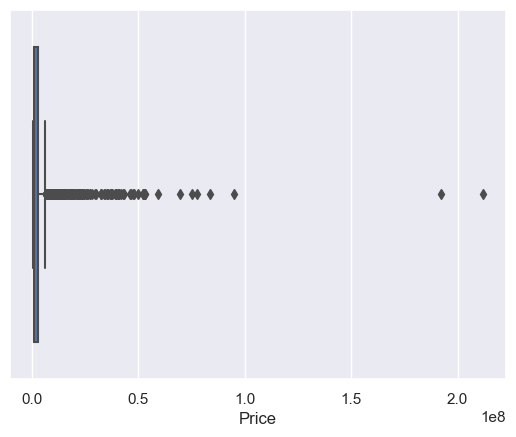

In [118]:
sns.boxplot(x='Price',data=df)

In [119]:
df[df["Price"]>=150000000]

Cylinders  Doors  Seating_Capacity  Number_of_Airbags     Make   Model  \
355       16.0    2.0               2.0                6.0  Bugatti  Chiron   
356       16.0    2.0               2.0                6.0  Bugatti  Chiron   

    Variant        Price  Displacement              Drivetrain Emission_Norm  \
355     W16  192142937.0        7993.0  RWD (Rear Wheel Drive)          BS 6   
356   Sport  212155397.0        7993.0  RWD (Rear Wheel Drive)          BS 6   

         Keyless_Entry   Power  Torque Odometer Speedometer Tachometer  \
355  Remote, Smart Key  1479.0  1600.0  Digital     Digital    Digital   
356  Remote, Smart Key  1600.0  1479.0  Digital     Digital    Digital   

    Tripmeter Fuel_Type  ARAI_Certified_Mileage  Front_Suspension  \
355       Yes    Petrol                    5.95  MacPherson Strut   
356       Yes    Petrol                    5.95           Runflat   

    Rear_Suspension  Ground_Clearance  Boot_Space  \
355    Torsion Beam        179.608916    387.5852   
356         Runflat        179.608916    387.5852   

                     Audiosystem Third_Row_AC_Vents  \
355  CD Player with USB & Aux-in     Not Applicable   
356  CD Player with USB & Aux-in     Not Applicable   

                  Ventilation_System Auto-Dimming_Rear-View_Mirror  \
355  Fully automatic climate control                           Yes   
356  Fully automatic climate control                           Yes   

    Hill_Assist Gear_Indicator ABS_(Anti-lock_Braking_System)  \
355         Yes            Yes                            Yes   
356         Yes            Yes                            Yes   

    EBD_(Electronic_Brake-force_Distribution) Gear_Shift_Reminder  \
355                                       Yes                 Yes   
356                                       Yes                 Yes   

    Adjustable_Steering_Column                         Parking_Assistance  \
355                Rake, Reach  Front & rear sensors with 360 degree view   
356                Rake, Reach  Front & rear sensors with 360 degree view   

    Key_Off_Reminder USB_Compatibility EBA_(Electronic_Brake_Assist)  \
355              Yes               Yes                           Yes   
356              Yes               Yes                           Yes   

              Seat_Height_Adjustment Navigation_System Second_Row_AC_Vents  \
355  Electric Adjustment with Memory               Yes         not_defined   
356  Electric Adjustment with Memory               Yes         not_defined   

    Rear_Center_Armrest ESP_(Electronic_Stability_Program) Cooled_Glove_Box  \
355         Cup Holders                                Yes              Yes   
356         Cup Holders                                Yes              Yes   

    Turbocharger Rain_Sensing_Wipers Automatic_Headlamps  \
355          Yes                 Yes                 Yes   
356          Yes                 Yes                 Yes   

    ASR_/_Traction_Control Cruise_Control  
355                    Yes            Yes  
356                    Yes            Yes

# find the average price of the car without 2 outliers

In [120]:
x=df[df["Price"]<=150000000]
x.head()

Cylinders  Doors  Seating_Capacity  Number_of_Airbags  Make      Model  \
0        2.0    5.0               4.0                NaN  Tata  Nano Genx   
1        2.0    5.0               4.0                NaN  Tata  Nano Genx   
2        2.0    4.0               4.0                NaN  Tata  Nano Genx   
3        2.0    5.0               4.0                NaN  Tata  Nano Genx   
4        2.0    5.0               4.0                NaN  Tata  Nano Genx   

   Variant     Price  Displacement              Drivetrain Emission_Norm  \
0       Xt  292667.0         624.0  RWD (Rear Wheel Drive)         BS IV   
1       Xe  236447.0         624.0  RWD (Rear Wheel Drive)         BS IV   
2  Emax Xm  296661.0         624.0  RWD (Rear Wheel Drive)         BS IV   
3      Xta  334768.0         624.0  RWD (Rear Wheel Drive)         BS IV   
4       Xm  272223.0         624.0  RWD (Rear Wheel Drive)         BS IV   

  Keyless_Entry  Power  Torque Odometer Speedometer    Tachometer Tripmeter  \
0        Remote   38.0    51.0  Digital      Analog  Not on offer       Yes   
1   not_defined   38.0    51.0  Digital      Analog  Not on offer       Yes   
2   not_defined   38.0    51.0  Digital      Analog  Not on offer       Yes   
3        Remote   38.0    51.0  Digital      Analog  Not on offer       Yes   
4   not_defined   38.0    51.0  Digital      Analog  Not on offer       Yes   

  Fuel_Type  ARAI_Certified_Mileage  \
0    Petrol               23.600000   
1    Petrol               23.600000   
2       CNG               18.667728   
3    Petrol               21.900000   
4    Petrol               23.600000   

                                    Front_Suspension  \
0  Independent, Lower Wishbone, McPherson Strut w...   
1  Independent, Lower Wishbone, McPherson Strut w...   
2  Independent, Lower Wishbone, McPherson Strut w...   
3  Independent, Lower Wishbone, McPherson Strut w...   
4  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension  Ground_Clearance  \
0  Independent, Semi Trailing arm with coil sprin...             180.0   
1  Independent, Semi Trailing arm with coil sprin...             180.0   
2  Independent, Semi Trailing arm with coil sprin...             180.0   
3  Independent, Semi Trailing arm with coil sprin...             180.0   
4  Independent, Semi Trailing arm with coil sprin...             180.0   

   Boot_Space                  Audiosystem Third_Row_AC_Vents  \
0       110.0  CD Player with USB & Aux-in     Not Applicable   
1       110.0                 Not on offer     Not Applicable   
2       110.0                 Not on offer     Not Applicable   
3        94.0  CD Player with USB & Aux-in     Not Applicable   
4       110.0                 Not on offer     Not Applicable   

                                 Ventilation_System  \
0  Manual Air conditioning with cooling and heating   
1                                       not_defined   
2                Air Conditioning with cooling only   
3  Manual Air conditioning with cooling and heating   
4                Air Conditioning with cooling only   

  Auto-Dimming_Rear-View_Mirror  Hill_Assist Gear_Indicator  \
0                   not_defined  not_defined    not_defined   
1                   not_defined  not_defined    not_defined   
2                           Yes          Yes    not_defined   
3                   not_defined  not_defined            Yes   
4                   not_defined  not_defined    not_defined   

  ABS_(Anti-lock_Braking_System) EBD_(Electronic_Brake-force_Distribution)  \
0                    not_defined                               not_defined   
1                    not_defined                               not_defined   
2                    not_defined                               not_defined   
3                    not_defined                               not_defined   
4                    not_defined                               not_defined   

  Gear_Shift_Reminder

In [121]:
x["Price"].mean()

4286408.171114599

# average price of the car is around 42 lac

In [122]:
df.corr()["Price"]

Cylinders                 0.820758
Doors                    -0.461746
Seating_Capacity         -0.307198
Number_of_Airbags         0.338862
Price                     1.000000
Displacement              0.794943
Power                     0.855190
Torque                    0.702175
ARAI_Certified_Mileage   -0.207777
Ground_Clearance         -0.012123
Boot_Space                0.049544
Name: Price, dtype: float64

In [123]:
x.corr()['Price']

Cylinders                 0.872156
Doors                    -0.495042
Seating_Capacity         -0.308686
Number_of_Airbags         0.419777
Price                     1.000000
Displacement              0.869717
Power                     0.851968
Torque                    0.717256
ARAI_Certified_Mileage   -0.220824
Ground_Clearance         -0.015871
Boot_Space                0.064865
Name: Price, dtype: float64

there is a positive strong correlation of Cylinders,Displacement,Torque ,Power  with price
Number_of_Airbags is also  positively correlated with low correlation.
while Doors,Seating_Capacity ,ARAI_Certified_Mileage ,Ground_Clearance is negatively correlated with price

### Cylinders,Displacement,Power and Torque are considered important features with respect to car price

## find out the average price of the car whose price is greater than average price of the cars in the data

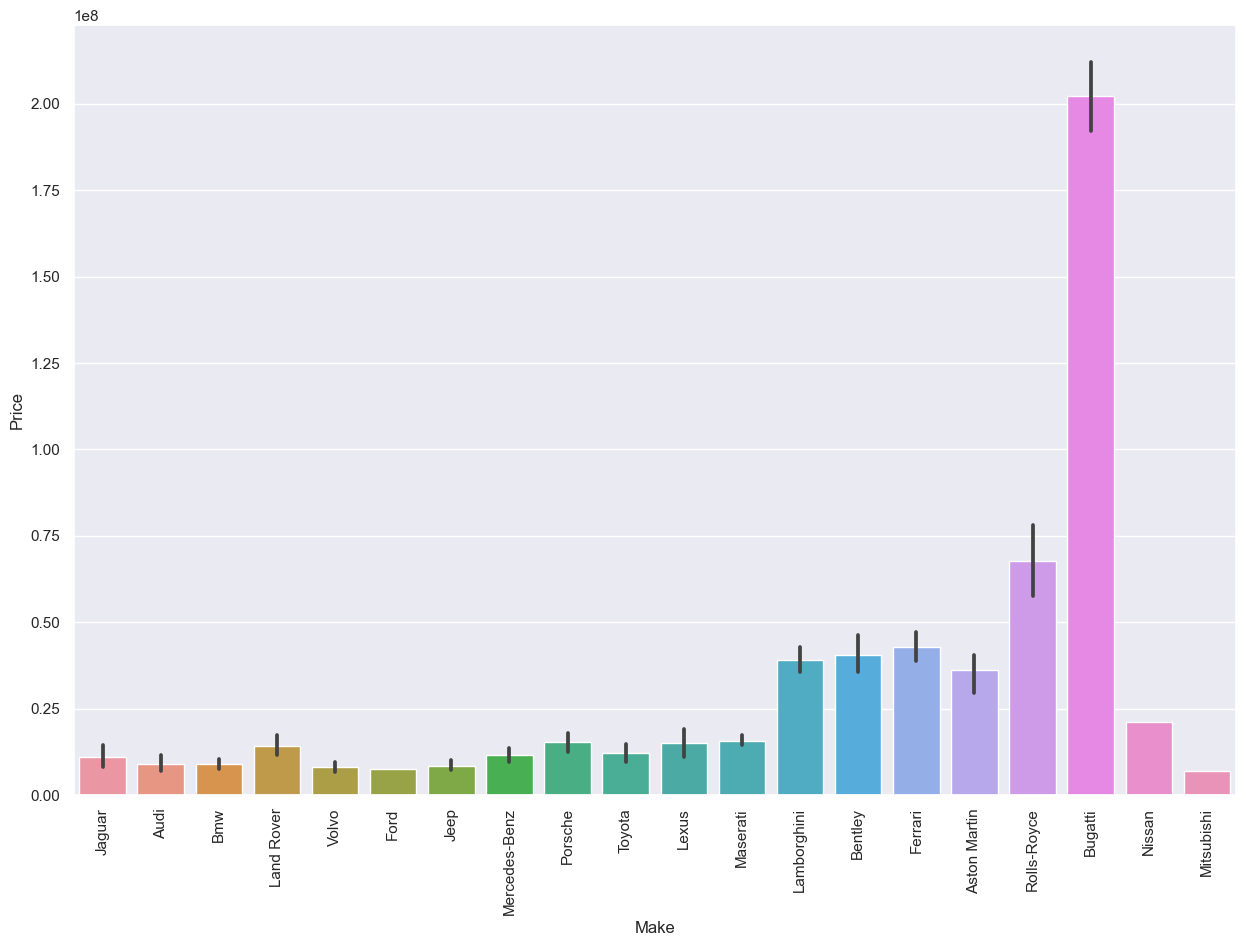

In [124]:
plt.figure(figsize=(15,10))
sns.barplot(x="Make",y="Price",data=df_a)
plt.xticks(rotation=90);

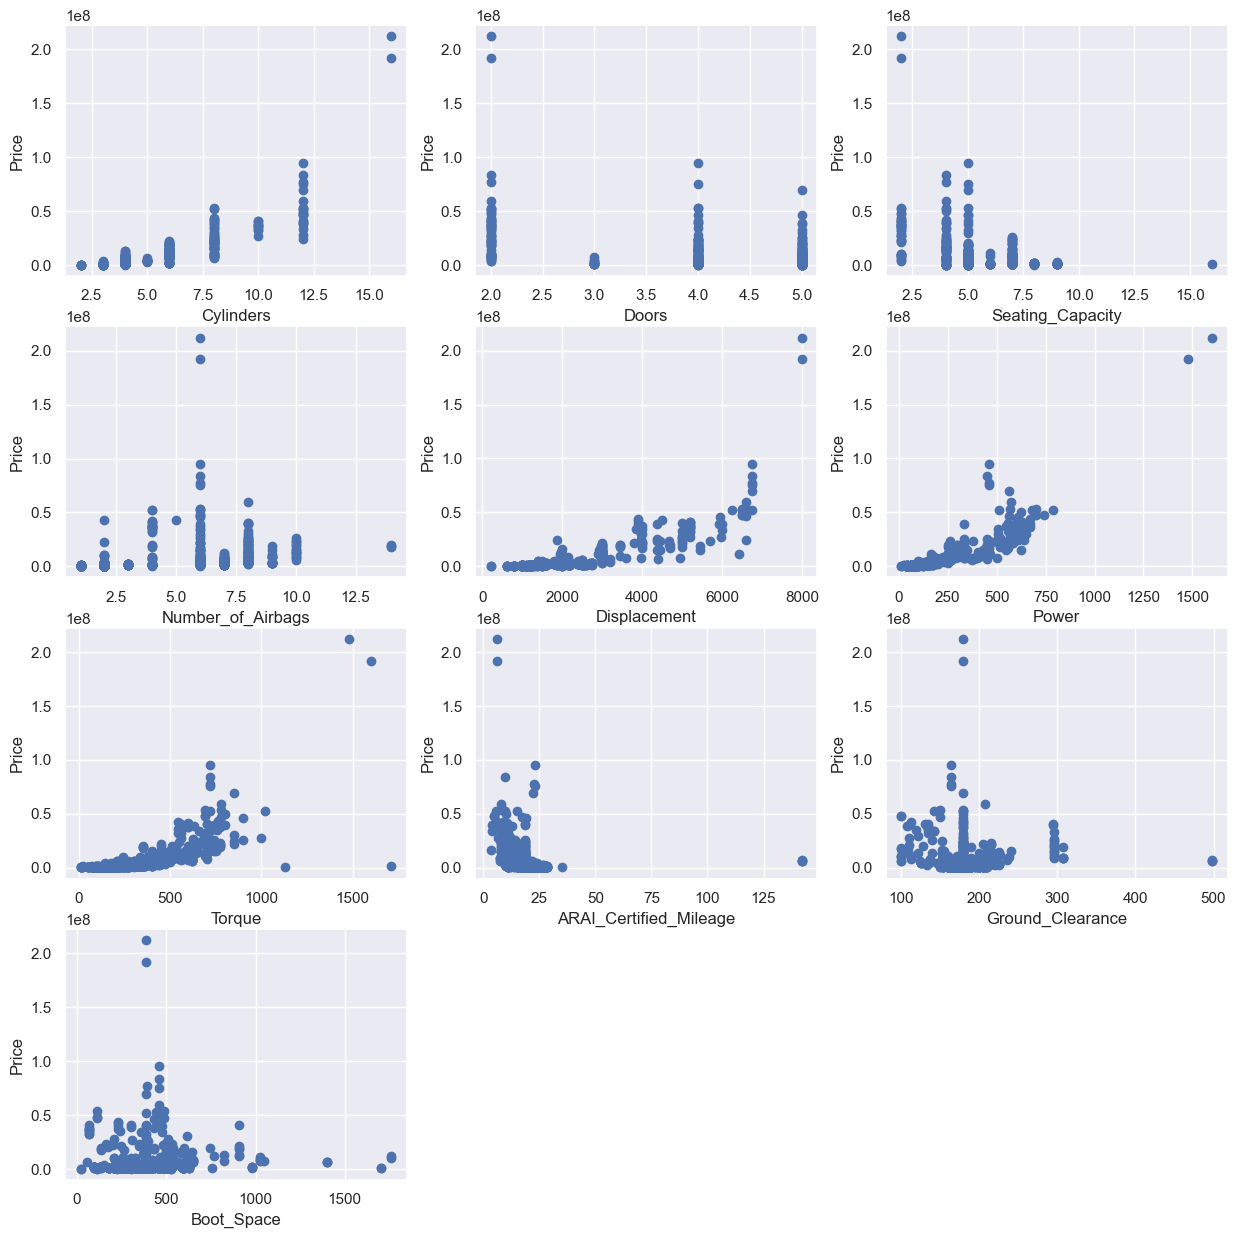

In [125]:
numeric=["int32","float64"]
n=1
plt.figure(figsize=(15,15))
for i in df.select_dtypes(include=numeric):
    if i!="Price":
        plt.subplot(4,3,n)
        plt.scatter(df[i],df["Price"])
        #plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Price")
        n=n+1

# we can visually see the plots without outliers so taking x dataframe

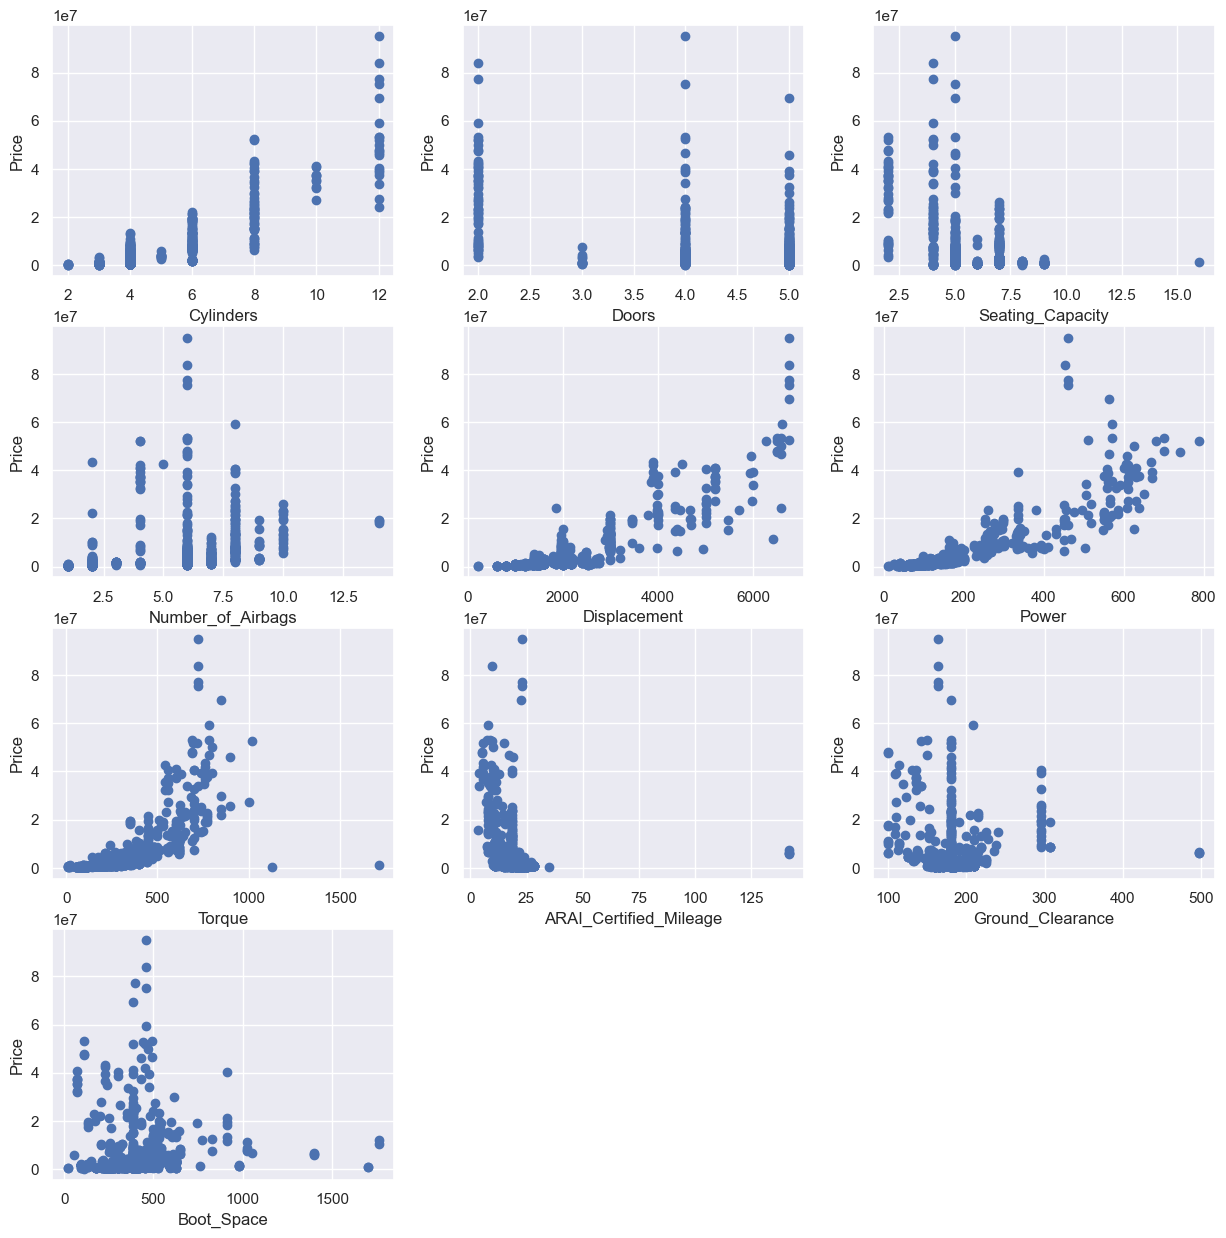

In [126]:
numeric=["int32","float64"]
n=1
plt.figure(figsize=(15,15))
for i in x.select_dtypes(include=numeric):
    if i!="Price":
        plt.subplot(4,3,n)
        plt.scatter(x[i],x["Price"])
        #plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Price")
        n=n+1

## How many cars of each companies ?

In [127]:
df["Make"].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Mercedes-Benz     57
Skoda             43
Ford              43
Land Rover        37
Bmw               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Datsun            24
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Porsche           14
Mg                13
Lamborghini       13
Icml              11
Mini              10
Lexus             10
Maserati           9
Rolls-Royce        9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: Make, dtype: int64

C:\Users\Prince kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


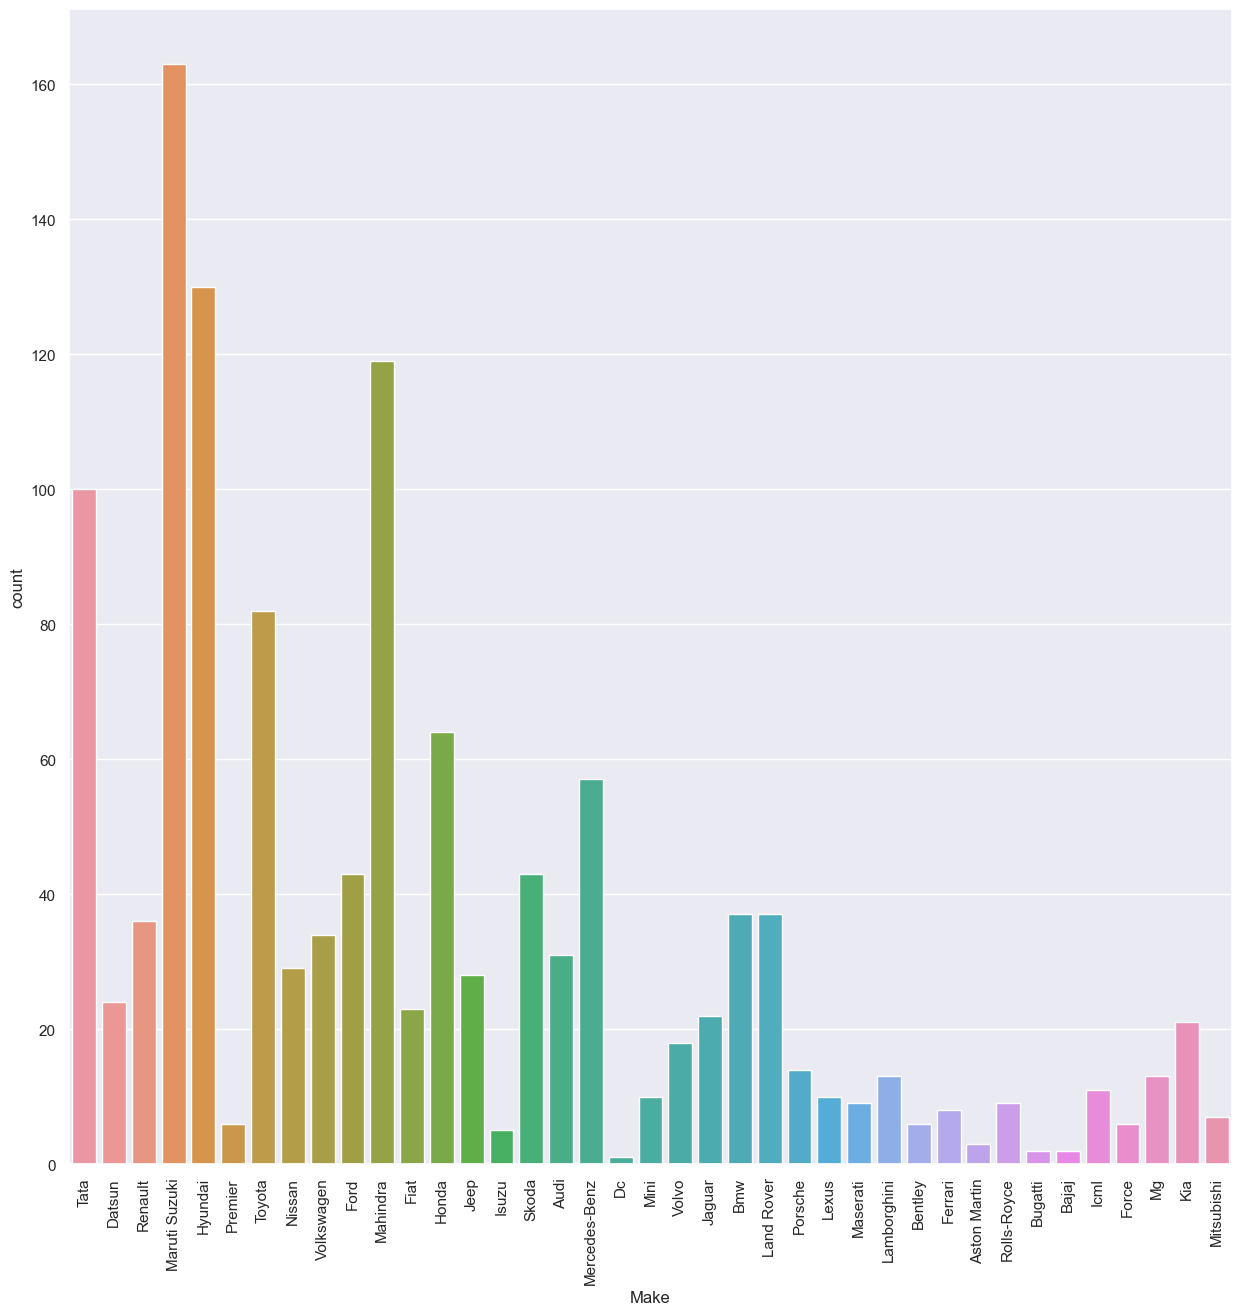

In [128]:
plt.figure(figsize=(15,15))
sns.countplot(df["Make"])
plt.xticks(rotation=90);

In [129]:
df.groupby(["Make"])["Price"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False)

min          max          mean
Make                                                 
Bugatti        192142937.0  212155397.0  2.021492e+08
Rolls-Royce     46709733.0   95000000.0  6.779633e+07
Ferrari         35000000.0   52000000.0  4.287250e+07
Bentley         33791059.0   52571294.0  4.056585e+07
Lamborghini     30000000.0   53210327.0  3.905392e+07
Aston Martin    29500000.0   40456503.0  3.626744e+07
Maserati        13387856.0   19865675.0  1.569689e+07
Porsche          6998000.0   22613000.0  1.534600e+07
Lexus            5695000.0   23290000.0  1.501530e+07
Land Rover       5494000.0   40499548.0  1.429447e+07
Jaguar           4498000.0   28004965.0  1.046450e+07
Mercedes-Benz    2785288.0   27308312.0  9.479082e+06
Bmw              3520000.0   24250000.0  8.256216e+06
Audi             2920750.0   27245000.0  7.240431e+06
Volvo            2769000.0   13124000.0  5.834750e+06
Mini             2990000.0    4350000.0  3.792000e+06
Mitsubishi       2693000.0    6862560.0  3.456193e+06
Dc               3407407.0    3407407.0  3.407407e+06
Jeep             1560000.0   11400000.0  3.203428e+06
Isuzu            1654783.0    2931534.0  2.225393e+06
Skoda             881916.0    3678599.0  1.973879e+06
Kia               989000.0    3395000.0  1.701143e+06
Nissan            525021.0   21240272.0  1.695369e+06
Toyota            520300.0   14699000.0  1.653056e+06
Mg               1248000.0    2358000.0  1.610308e+06
Volkswagen        582000.0    3321500.0  1.321924e+06
Honda             593000.0    4321237.0  1.206137e+06
Force             975000.0    1330000.0  1.150500e+06
Ford              523000.0    7462000.0  1.123854e+06
Mahindra          488194.0    3070150.0  1.105725e+06
Hyundai           429990.0    2697417.0  9.874765e+05
Icml              552890.0    2650777.0  9.700829e+05
Tata              236447.0    1929417.0  9.371146e+05
Renault           283290.0    1299999.0  8.011078e+05
Fiat              482330.0     997763.0  7.795563e+05
Maruti Suzuki     282778.0    1151189.0  6.738911e+05
Premier           506000.0     739000.0  6.376038e+05
Datsun            279650.0     680153.0  4.960754e+05
Bajaj             263000.0     283000.0  2.730000e+05

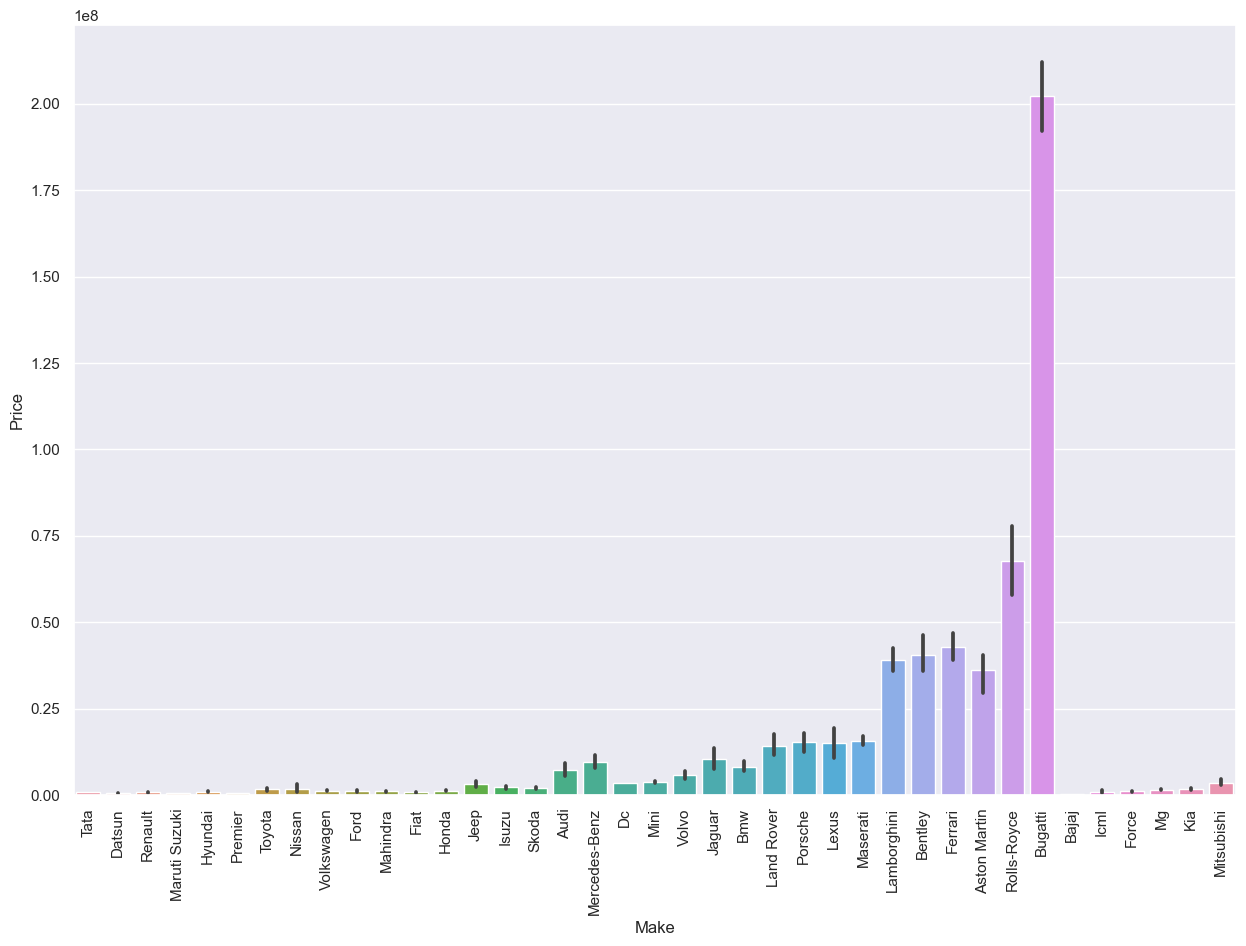

In [130]:
plt.figure(figsize=(15,10))
sns.barplot(x="Make",y="Price",data=df)
plt.xticks(rotation=90);

## Find the details of above top 3 expensive company's cars

In [131]:
df[((df["Make"]=="Bugatti")|(df["Make"]=="Ferrari")|(df["Make"]=="Rolls-Royce"))]

Cylinders  Doors  Seating_Capacity  Number_of_Airbags         Make  \
344         8.0    2.0               2.0                4.0      Ferrari   
348         8.0    2.0               2.0                5.0      Ferrari   
349        12.0    4.0               5.0                6.0  Rolls-Royce   
350        12.0    4.0               5.0                6.0  Rolls-Royce   
351        12.0    2.0               4.0                NaN  Rolls-Royce   
353        12.0    5.0               5.0                NaN  Rolls-Royce   
354        12.0    2.0               4.0                6.0  Rolls-Royce   
355        16.0    2.0               2.0                6.0      Bugatti   
356        16.0    2.0               2.0                6.0      Bugatti   
872         8.0    2.0               2.0                4.0      Ferrari   
873         8.0    2.0               2.0                4.0      Ferrari   
874         8.0    2.0               4.0                4.0      Ferrari   
875         8.0    2.0               4.0                4.0      Ferrari   
879        12.0    2.0               4.0                8.0  Rolls-Royce   
880        12.0    2.0               4.0                6.0  Rolls-Royce   
1058       12.0    2.0               2.0                4.0      Ferrari   
1172        8.0    2.0               2.0                2.0      Ferrari   
1219       12.0    4.0               5.0                6.0  Rolls-Royce   
1220       12.0    4.0               5.0                6.0  Rolls-Royce   

                            Model         Variant        Price  Displacement  \
344                     Portofino  V8 Convertible   35000000.0        3855.0   
348                  458 Speciale           Coupe   42531500.0        4497.0   
349   Rolls-Royce Ghost Series Ii             6.6   46709733.0        6593.0   
350   Rolls-Royce Ghost Series Ii             Ewb   53247201.0        6592.0   
351            Rolls-Royce Wraith           Coupe   50025840.0        6592.0   
353          Rolls-Royce Cullinan             Suv   69500000.0        6750.0   
354     Rolls-Royce Phantom Coupe           6.8 L   77312661.0        6749.0   
355                        Chiron             W16  192142937.0        7993.0   
356                        Chiron           Sport  212155397.0        7993.0   
872                       488 Gtb             Std   36761413.0        3902.0   
873                       488 Gtb          Spider   39319552.0        3902.0   
874                    Gtc4 Lusso            V8 T   42000000.0        3900.0   
875                    Gtc4 Lusso             V12   52000000.0        6262.0   
879              Rolls-Royce Dawn     Convertible   59216193.0        6598.0   
880    Rolls-Royce Drophead Coupe         Phantom   83755383.0        6749.0   
1058                812 Superfast       Superfast   52000000.0        6496.0   
1172                   458 Spider              V8   43367500.0        3902.0   
1219          Rolls-Royce Phantom           Sedan   95000000.0        6749.0   
1220          Rolls-Royce Phantom             Ewb   75400000.0        6749.0   

                  Drivetrain Emission_Norm      Keyless_Entry   Power  Torque  \
344    AWD (All Wheel Drive)         BS IV          Smart Key   560.0   755.0   
348    AWD (All Wheel Drive)         BS IV          Smart Key   605.0   540.0   
349   RWD (Rear Wheel Drive)         BS IV          Smart Key   563.0   780.0   
350   RWD (Rear Wheel Drive)         BS IV          Smart Key   570.0   780.0   
351    AWD (All Wheel Drive)         BS IV          Smart Key   625.0   800.0   
353    AWD (All Wheel Drive)          BS 6        not_defined   563.0   850.0   
354   RWD (Rear Wheel Drive)         BS IV          Smart Key   460.0   720.0   
355   RWD (Rear Wheel Drive)          BS 6  Remote, Smart Key  1479.0  1600.0   
356   RWD (Rear Wheel Drive)          BS 6  Remote, Smart Key  1600.0  1479.0   
872    AWD (All Wheel Drive)         BS IV          Smart Key   670.0   76

## Now Find the cause why buggati ,rolls-royce , and Ferrari company's car are expensive what features they have provided so we compare these on the basis of some premium features based on domain knowledge
We will consider following premium features in order to differentiate the above top 3 expensive cars with respect to price:
Premium feeatures which makes the difference of price in above premium cars(top 3 expensive cars)

- CYLINDER
- POWER
- TORQUE
- discplacement

In [132]:
grp=df.groupby(["Make"])["Cylinders","Displacement","Torque","Power"]

C:\Users\Prince kumar\AppData\Local\Temp\ipykernel_10236\581972524.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp=df.groupby(["Make"])["Cylinders","Displacement","Torque","Power"]


In [133]:
grp

In [134]:
grp.get_group("Bugatti")

Cylinders  Displacement  Torque   Power
355       16.0        7993.0  1600.0  1479.0
356       16.0        7993.0  1479.0  1600.0

In [135]:
grp.get_group("Ferrari")

Cylinders  Displacement  Torque  Power
344         8.0        3855.0   755.0  560.0
348         8.0        4497.0   540.0  605.0
872         8.0        3902.0   760.0  670.0
873         8.0        3902.0   760.0  670.0
874         8.0        3900.0   760.0  610.0
875         8.0        6262.0   697.0  681.0
1058       12.0        6496.0   718.0  789.0
1172        8.0        3902.0   760.0  669.0

In [137]:
grp.get_group("Rolls-Royce")

Cylinders  Displacement  Torque  Power
349        12.0        6593.0   780.0  563.0
350        12.0        6592.0   780.0  570.0
351        12.0        6592.0   800.0  625.0
353        12.0        6750.0   850.0  563.0
354        12.0        6749.0   720.0  460.0
879        12.0        6598.0   780.0  571.0
880        12.0        6749.0   720.0  453.0
1219       12.0        6749.0   720.0  460.0
1220       12.0        6749.0   720.0  460.0

## taking numeric columns

In [138]:
### Correlation of numeric columns in df with price 
df.corr()["Price"]

Cylinders                 0.820758
Doors                    -0.461746
Seating_Capacity         -0.307198
Number_of_Airbags         0.338862
Price                     1.000000
Displacement              0.794943
Power                     0.855190
Torque                    0.702175
ARAI_Certified_Mileage   -0.207777
Ground_Clearance         -0.012123
Boot_Space                0.049544
Name: Price, dtype: float64

### A Buyer can choose  cars based on following factors :
1) Safety

2) Power

3) Torque

4) seating_capacity

5) Mileage

6) Fue type

In [139]:
df.groupby(["Make"])["Number_of_Airbags"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False)

min   max       mean
Make                               
Lexus          8.0  14.0  10.600000
Land Rover     6.0  10.0   7.638889
Audi           4.0  10.0   7.580645
Aston Martin   6.0   8.0   7.333333
Mercedes-Benz  6.0  10.0   7.285714
Bmw            4.0  10.0   7.054054
Porsche        4.0  10.0   7.000000
Volvo          6.0   8.0   6.611111
Rolls-Royce    6.0   8.0   6.285714
Bentley        6.0   6.0   6.000000
Bugatti        6.0   6.0   6.000000
Maserati       4.0   6.0   5.666667
Jaguar         2.0   6.0   5.047619
Skoda          2.0   9.0   4.906977
Lamborghini    4.0   8.0   4.769231
Mg             2.0   6.0   4.461538
Jeep           2.0   7.0   4.178571
Toyota         2.0   9.0   4.073171
Ferrari        2.0   5.0   3.875000
Mini           2.0   6.0   3.600000
Ford           2.0   8.0   3.581395
Kia            2.0   6.0   3.523810
Mitsubishi     2.0   7.0   3.285714
Volkswagen     2.0   9.0   3.058824
Isuzu          2.0   6.0   2.800000
Hyundai        1.0   6.0   2.796748
Honda          2.0   8.0   2.656250
Mahindra       1.0   9.0   2.646341
Nissan         1.0   7.0   2.172414
Tata           1.0   6.0   2.137500
Datsun         2.0   2.0   2.000000
Renault        1.0   4.0   1.878788
Fiat           1.0   2.0   1.818182
Maruti Suzuki  1.0   2.0   1.795918
Bajaj          NaN   NaN        NaN
Dc             NaN   NaN        NaN
Force          NaN   NaN        NaN
Icml           NaN   NaN        NaN
Premier        NaN   NaN        NaN

In [143]:
df.isna().sum()*100/df.shape[0]

Cylinders                                     5.172414
Doors                                         0.313480
Seating_Capacity                              0.470219
Number_of_Airbags                            10.579937
Make                                          0.000000
Model                                         0.000000
Variant                                       0.000000
Price                                         0.000000
Displacement                                  0.000000
Drivetrain                                    0.000000
Emission_Norm                                 0.000000
Keyless_Entry                                 0.000000
Power                                         0.000000
Torque                                        0.000000
Odometer                                      0.000000
Speedometer                                   0.000000
Tachometer                                    0.000000
Tripmeter                                     0.000000
Fuel_Type 

In [144]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Fuel_Type                                     

In [145]:
for i in df:
    if df[i].isna().any():
        df[i].fillna(df[i].mean(),inplace=True)

In [146]:
df.isna().sum()

Cylinders                                    0
Doors                                        0
Seating_Capacity                             0
Number_of_Airbags                            0
Make                                         0
Model                                        0
Variant                                      0
Price                                        0
Displacement                                 0
Drivetrain                                   0
Emission_Norm                                0
Keyless_Entry                                0
Power                                        0
Torque                                       0
Odometer                                     0
Speedometer                                  0
Tachometer                                   0
Tripmeter                                    0
Fuel_Type                                    0
ARAI_Certified_Mileage                       0
Front_Suspension                             0
Rear_Suspensi

In [147]:
df.groupby(["Make"])["Number_of_Airbags"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False)

min        max       mean
Make                                         
Lexus          8.000000  14.000000  10.600000
Audi           4.000000  10.000000   7.580645
Land Rover     3.787029  10.000000   7.534785
Aston Martin   6.000000   8.000000   7.333333
Mercedes-Benz  3.787029  10.000000   7.224334
Bmw            4.000000  10.000000   7.054054
Porsche        4.000000  10.000000   7.000000
Volvo          6.000000   8.000000   6.611111
Bugatti        6.000000   6.000000   6.000000
Bentley        6.000000   6.000000   6.000000
Rolls-Royce    3.787029   8.000000   5.730451
Maserati       3.787029   6.000000   5.040121
Jaguar         2.000000   6.000000   4.990319
Skoda          2.000000   9.000000   4.906977
Lamborghini    4.000000   8.000000   4.769231
Mg             2.000000   6.000000   4.461538
Jeep           2.000000   7.000000   4.178571
Toyota         2.000000   9.000000   4.073171
Ferrari        2.000000   5.000000   3.875000
Icml           3.787029   3.787029   3.787029
Dc             3.787029   3.787029   3.787029
Premier        3.787029   3.787029   3.787029
Bajaj          3.787029   3.787029   3.787029
Force          3.787029   3.787029   3.787029
Mini           2.000000   6.000000   3.600000
Ford           2.000000   8.000000   3.581395
Kia            2.000000   6.000000   3.523810
Mitsubishi     2.000000   7.000000   3.285714
Volkswagen     2.000000   9.000000   3.058824
Mahindra       1.000000   9.000000   3.001009
Hyundai        1.000000   6.000000   2.850071
Fiat           1.000000   3.787029   2.845406
Isuzu          2.000000   6.000000   2.800000
Honda          2.000000   8.000000   2.656250
Tata           1.000000   6.000000   2.467406
Datsun         2.000000   3.787029   2.446757
Nissan         1.000000   7.000000   2.172414
Renault        1.000000   4.000000   2.037808
Maruti Suzuki  1.000000   3.787029   1.991365

## Power
* Find the max,min and average power of each company gives

In [148]:
df.groupby(["Make"])["Power"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

max     min         mean
Make                                      
Bugatti        1600.0  1479.0  1539.500000
Ferrari         789.0   560.0   656.750000
Lamborghini     740.0   571.0   636.461538
Bentley         616.0   507.0   563.833333
Aston Martin    608.0   505.0   557.666667
Rolls-Royce     625.0   453.0   525.000000
Porsche         550.0   248.0   418.714286
Maserati        460.0   275.0   340.555556
Land Rover      567.0   179.0   318.540541
Jaguar          567.0   180.0   297.181818
Mercedes-Benz   639.0   122.0   283.157895
Bmw             625.0   187.0   277.945946
Lexus           380.0   176.0   266.300000
Dc              250.0   250.0   250.000000
Audi            610.0   143.0   244.129032
Volvo           407.0   150.0   222.944444
Jeep            468.0   162.0   193.035714
Mini            231.0   116.0   180.500000
Mitsubishi      202.0   167.0   179.857143
Isuzu           177.0   134.0   154.400000
Mg              168.0   141.0   149.461538
Kia             200.0   114.0   139.952381
Skoda           180.0   105.0   139.744186
Icml            122.0   101.0   116.272727
Toyota          265.0    68.0   114.497561
Ford            401.0    96.0   114.023256
Volkswagen      180.0    76.0   110.529412
Nissan          570.0    64.0   108.620690
Mahindra        178.0    25.8   104.836134
Honda           154.0    80.0   104.375000
Force           140.0    85.0   103.333333
Hyundai         185.0    59.0    99.390769
Tata            156.0    38.0    98.900000
Fiat            145.0    68.0    94.521739
Renault         110.0    54.0    84.805556
Maruti Suzuki   104.0    34.7    77.935583
Premier          76.6    64.0    69.533333
Datsun           78.0    54.0    67.333333
Bajaj            13.0    12.0    12.500000

# Insight :
According to Power point of view top 3 companies :

1- Ferrari

2- Lamborghini

3- Bentley

found to be good company cars which provides average power 656.75, 636.46 , 563.83 repectively.

## Torque
Find the max,min and average Torque of each company gives

In [150]:
df.groupby(["Make"])["Torque"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

max          min         mean
Make                                           
Bugatti        1600.0  1479.000000  1539.500000
Bentley        1020.0   660.000000   811.666667
Rolls-Royce     850.0   720.000000   763.333333
Ferrari         760.0   540.000000   718.750000
Aston Martin    700.0   630.000000   671.666667
Lamborghini     850.0   540.000000   618.461538
Maserati        600.0   500.000000   564.444444
Porsche         770.0   370.000000   562.142857
Land Rover      740.0   340.000000   526.891892
Mercedes-Benz  1000.0   200.000000   483.035088
Bmw             850.0   266.520879   482.608672
Jaguar          700.0   340.000000   479.681818
Volvo           640.0   240.000000   407.777778
Audi            700.0   250.000000   406.129032
Mitsubishi      441.0   222.000000   366.142857
Lexus           650.0   210.000000   357.200000
Jeep            624.0   250.000000   352.178571
Isuzu           380.0   320.000000   350.000000
Dc              340.0   340.000000   340.000000
Mg              353.0   250.000000   296.615385
Mini            400.0   270.000000   294.000000
Kia             440.0   144.000000   268.476190
Icml            270.0   240.000000   261.818182
Force           321.0   230.000000   260.333333
Skoda           350.0   153.000000   259.232558
Mahindra        420.0    70.000000   241.357318
Volkswagen      350.0    95.000000   220.558824
Toyota          650.0   104.000000   207.804878
Tata            400.0    51.000000   196.390000
Nissan          637.0   104.000000   194.620690
Ford            515.0   120.000000   194.418605
Fiat            212.0    96.000000   192.000000
Hyundai        1712.0     8.300000   172.520000
Honda           300.0   110.000000   167.046875
Renault         245.0    72.000000   151.666667
Premier         183.0   103.000000   140.833333
Maruti Suzuki  1130.0    59.000000   134.417178
Datsun          104.0    72.000000    97.583333
Bajaj            18.9    16.100000    17.500000

Insight :
According to Torque point of view top 3 companies :

1- Buggati

2- Bentley

3- Rolls Royce

found to be good company cars which provides average torque 763.33, 718.75 , 671.66 repectively.

In [151]:
df.groupby(["Make"])["Torque"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

max          min         mean
Make                                           
Bugatti        1600.0  1479.000000  1539.500000
Bentley        1020.0   660.000000   811.666667
Rolls-Royce     850.0   720.000000   763.333333
Ferrari         760.0   540.000000   718.750000
Aston Martin    700.0   630.000000   671.666667
Lamborghini     850.0   540.000000   618.461538
Maserati        600.0   500.000000   564.444444
Porsche         770.0   370.000000   562.142857
Land Rover      740.0   340.000000   526.891892
Mercedes-Benz  1000.0   200.000000   483.035088
Bmw             850.0   266.520879   482.608672
Jaguar          700.0   340.000000   479.681818
Volvo           640.0   240.000000   407.777778
Audi            700.0   250.000000   406.129032
Mitsubishi      441.0   222.000000   366.142857
Lexus           650.0   210.000000   357.200000
Jeep            624.0   250.000000   352.178571
Isuzu           380.0   320.000000   350.000000
Dc              340.0   340.000000   340.000000
Mg              353.0   250.000000   296.615385
Mini            400.0   270.000000   294.000000
Kia             440.0   144.000000   268.476190
Icml            270.0   240.000000   261.818182
Force           321.0   230.000000   260.333333
Skoda           350.0   153.000000   259.232558
Mahindra        420.0    70.000000   241.357318
Volkswagen      350.0    95.000000   220.558824
Toyota          650.0   104.000000   207.804878
Tata            400.0    51.000000   196.390000
Nissan          637.0   104.000000   194.620690
Ford            515.0   120.000000   194.418605
Fiat            212.0    96.000000   192.000000
Hyundai        1712.0     8.300000   172.520000
Honda           300.0   110.000000   167.046875
Renault         245.0    72.000000   151.666667
Premier         183.0   103.000000   140.833333
Maruti Suzuki  1130.0    59.000000   134.417178
Datsun          104.0    72.000000    97.583333
Bajaj            18.9    16.100000    17.500000

## Seating capacity


Find the max,min and average seating capacity of each company gives¶

In [153]:
df.groupby(["Make"])["Seating_Capacity"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

max  min      mean
Make                                   
Icml            9.000000  7.0  8.454545
Mitsubishi      7.000000  7.0  7.000000
Mahindra        9.000000  4.0  6.514875
Land Rover      7.000000  4.0  6.135135
Isuzu           7.000000  5.0  5.800000
Datsun          7.000000  5.0  5.750000
Renault         8.000000  5.0  5.674169
Toyota          8.000000  5.0  5.670732
Force           7.000000  5.0  5.666667
Kia             7.000000  5.0  5.476190
Volvo           7.000000  4.0  5.333333
Honda           7.000000  5.0  5.312500
Lexus           7.000000  4.0  5.300000
Tata           16.000000  4.0  5.240000
Maruti Suzuki   8.000000  5.0  5.214724
Audi            7.000000  2.0  5.193548
Ford            7.000000  4.0  5.116279
Skoda           7.000000  5.0  5.046512
Volkswagen      5.270079  5.0  5.007943
Mg              5.000000  5.0  5.000000
Premier         5.000000  5.0  5.000000
Jeep            5.000000  5.0  5.000000
Fiat            5.000000  5.0  5.000000
Hyundai         5.000000  4.0  4.992308
Nissan          5.000000  4.0  4.965517
Mercedes-Benz   7.000000  2.0  4.947368
Bmw             7.000000  2.0  4.594595
Rolls-Royce     5.000000  4.0  4.555556
Mini            5.000000  2.0  4.500000
Maserati        5.000000  4.0  4.333333
Bentley         5.000000  4.0  4.333333
Porsche         5.270079  2.0  4.252868
Bajaj           4.000000  4.0  4.000000
Jaguar          5.270079  2.0  3.966822
Aston Martin    4.000000  2.0  2.666667
Ferrari         4.000000  2.0  2.500000
Lamborghini     5.000000  2.0  2.230769
Dc              2.000000  2.0  2.000000
Bugatti         2.000000  2.0  2.000000

Insight :
According to seating_capacity point of view top 3 companies :

1- Icml : 8 seater

2- Mitsubishi : 7 seater

3- Mahindra : 6 seater

In [154]:
df.groupby(["Make"])["ARAI_Certified_Mileage"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

max        min       mean
Make                                           
Bajaj           35.000000  18.667728  26.833864
Mercedes-Benz  142.000000   7.800000  22.974865
Maruti Suzuki   28.400000  11.900000  22.318907
Honda           27.400000  14.400000  21.362500
Datsun          25.170000  20.100000  21.353333
Ford            26.100000  10.910000  21.044598
Renault         25.170000  13.860000  20.630000
Tata            27.280000  14.000000  20.234636
Nissan          23.080000   9.000000  19.232759
Hyundai         25.400000  12.950000  19.124549
Volkswagen      21.730000  16.090000  19.086765
Fiat            21.200000  14.900000  18.747826
Mg              18.667728  17.410000  18.280735
Kia             20.000000  16.100000  18.197078
Volvo           21.700000  16.000000  18.029243
Skoda           21.720000  13.700000  17.680930
Mahindra        25.320000  10.220000  17.644610
Force           18.667728  17.000000  17.555909
Toyota          23.900000   9.000000  17.515488
Lexus           18.667728  15.400000  17.326773
Premier         23.700000  16.000000  17.283333
Mini            21.150000  13.800000  16.533000
Rolls-Royce     23.000000   7.290000  15.965556
Audi            20.380000   6.710000  15.916012
Land Rover      18.667728   9.170000  15.779165
Jeep            17.100000   8.400000  15.496786
Bmw             21.760000   7.600000  15.264263
Jaguar          21.270000  10.700000  14.416612
Aston Martin    18.667728   8.000000  13.189243
Maserati        18.667728   7.900000  11.933687
Isuzu           13.800000  10.300000  11.700000
Porsche         18.667728   3.400000  11.380390
Icml            11.120000  11.120000  11.120000
Mitsubishi      11.560000   9.620000  10.718571
Dc              10.000000  10.000000  10.000000
Lamborghini     11.240000   5.000000   9.283077
Bentley         19.000000   4.000000   8.978333
Ferrari         14.900000   5.500000   7.550000
Bugatti          5.950000   5.950000   5.950000

In [155]:
df.columns

Index(['Cylinders', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Make',
       'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Au

## based on fuel type

In [169]:
z=df.groupby(["Make",'Fuel_Type'])["Fuel_Type"].count().to_frame()
a=z['Fuel_Type'].sort_values(ascending=False)
z

Fuel_Type
Make          Fuel_Type              
Aston Martin  Petrol                3
Audi          Diesel               12
              Petrol               19
Bajaj         CNG                   1
              Petrol                1
Bentley       Petrol                6
Bmw           Diesel               21
              Hybrid                1
              Petrol               15
Bugatti       Petrol                2
Datsun        Petrol               24
Dc            Petrol                1
Ferrari       Petrol                8
Fiat          Diesel               15
              Petrol                8
Force         Diesel                6
Ford          CNG                   1
              Diesel               22
              Petrol               20
Honda         Diesel               29
              Hybrid                1
              Petrol               34
Hyundai       CNG                   5
              CNG + Petrol          3
              Diesel               46
              Electric              1
              Petrol               75
Icml          Diesel               11
Isuzu         Diesel                5
Jaguar        Diesel                9
              Petrol               13
Jeep          Diesel               18
              Petrol               10
Kia           Diesel               12
              Petrol                9
Lamborghini   Petrol               13
Land Rover    Diesel               17
              Petrol               20
Lexus         Diesel                2
              Hybrid                5
              Petrol                3
Mahindra      Diesel               97
              Electric              5
              Petrol               17
Maruti Suzuki CNG                   8
              CNG + Petrol          3
              Diesel               42
              Petrol              110
Maserati      Diesel                7
              Petrol                2
Mercedes-Benz Diesel               27
              Petrol               30
Mg            Diesel                4
              Electric              2
              Hybrid                3
              Petrol                4
Mini          Diesel                2
              Petrol                8
Mitsubishi    Diesel                6
              Petrol                1
Nissan        Diesel               17
              Petrol               12
Porsche       Hybrid                1
              Petrol               13
Premier       Diesel                4
              Petrol                2
Renault       Diesel               15
              Petrol               21
Rolls-Royce   Petrol                9
Skoda         Diesel               23
              Petrol               20
Tata          CNG                   1
              Diesel               47
              Electric              6
              Petrol               46
Toyota        Diesel               32
              Hybrid                2
              Petrol               48
Volkswagen    Diesel               21
              Petrol               13
Volvo         Diesel               13
              Hybrid                2
              Petrol                3

In [172]:
a.to_frame()

Fuel_Type
Make          Fuel_Type              
Maruti Suzuki Petrol              110
Mahindra      Diesel               97
Hyundai       Petrol               75
Toyota        Petrol               48
Tata          Diesel               47
Hyundai       Diesel               46
Tata          Petrol               46
Maruti Suzuki Diesel               42
Honda         Petrol               34
Toyota        Diesel               32
Mercedes-Benz Petrol               30
Honda         Diesel               29
Mercedes-Benz Diesel               27
Datsun        Petrol               24
Skoda         Diesel               23
Ford          Diesel               22
Bmw           Diesel               21
Volkswagen    Diesel               21
Renault       Petrol               21
Skoda         Petrol               20
Ford          Petrol               20
Land Rover    Petrol               20
Audi          Petrol               19
Jeep          Diesel               18
Land Rover    Diesel               17
Nissan        Diesel               17
Mahindra      Petrol               17
Fiat          Diesel               15
Bmw           Petrol               15
Renault       Diesel               15
Jaguar        Petrol               13
Porsche       Petrol               13
Lamborghini   Petrol               13
Volkswagen    Petrol               13
Volvo         Diesel               13
Audi          Diesel               12
Kia           Diesel               12
Nissan        Petrol               12
Icml          Diesel               11
Jeep          Petrol               10
Jaguar        Diesel                9
Rolls-Royce   Petrol                9
Kia           Petrol                9
Fiat          Petrol                8
Mini          Petrol                8
Maruti Suzuki CNG                   8
Ferrari       Petrol                8
Maserati      Diesel                7
Bentley       Petrol                6
Force         Diesel                6
Tata          Electric              6
Mitsubishi    Diesel                6
Mahindra      Electric              5
Hyundai       CNG                   5
Isuzu         Diesel                5
Lexus         Hybrid                5
Mg            Diesel                4
Premier       Diesel                4
Mg            Petrol                4
Aston Martin  Petrol                3
Volvo         Petrol                3
Mg            Hybrid                3
Maruti Suzuki CNG + Petrol          3
Lexus         Petrol                3
Hyundai       CNG + Petrol          3
Toyota        Hybrid                2
Volvo         Hybrid                2
Mg            Electric              2
Premier       Petrol                2
Maserati      Petrol                2
Lexus         Diesel                2
Mini          Diesel                2
Bugatti       Petrol                2
Bajaj         CNG                   1
              Petrol                1
Bmw           Hybrid                1
Mitsubishi    Petrol                1
Dc            Petrol                1
Ford          CNG                   1
Honda         Hybrid                1
Hyundai       Electric              1
Porsche       Hybrid                1
Tata          CNG                   1

In [173]:
a.index

MultiIndex([('Maruti Suzuki',       'Petrol'),
            (     'Mahindra',       'Diesel'),
            (      'Hyundai',       'Petrol'),
            (       'Toyota',       'Petrol'),
            (         'Tata',       'Diesel'),
            (      'Hyundai',       'Diesel'),
            (         'Tata',       'Petrol'),
            ('Maruti Suzuki',       'Diesel'),
            (        'Honda',       'Petrol'),
            (       'Toyota',       'Diesel'),
            ('Mercedes-Benz',       'Petrol'),
            (        'Honda',       'Diesel'),
            ('Mercedes-Benz',       'Diesel'),
            (       'Datsun',       'Petrol'),
            (        'Skoda',       'Diesel'),
            (         'Ford',       'Diesel'),
            (          'Bmw',       'Diesel'),
            (   'Volkswagen',       'Diesel'),
            (      'Renault',       'Petrol'),
            (        'Skoda',       'Petrol'),
            (         'Ford',       'Petrol'),
            (

## taking those features having only two unqiue values yes or no and treat them as extra features now
and add model also in it

In [174]:
extra_features = ["Navigation_System","Second_Row_AC_Vents","ESP_(Electronic_Stability_Program)","Cooled_Glove_Box","Turbocharger","Rain_Sensing_Wipers","Automatic_Headlamps","Cruise_Control","Make","Price","EBA_(Electronic_Brake_Assist)","EBD_(Electronic_Brake-force_Distribution)","ABS_(Anti-lock_Braking_System)","Gear_Indicator","Auto-Dimming_Rear-View_Mirror","Hill_Assist","Key_Off_Reminder","USB_Compatibility","Model"]
extra_features

['Navigation_System',
 'Second_Row_AC_Vents',
 'ESP_(Electronic_Stability_Program)',
 'Cooled_Glove_Box',
 'Turbocharger',
 'Rain_Sensing_Wipers',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Make',
 'Price',
 'EBA_(Electronic_Brake_Assist)',
 'EBD_(Electronic_Brake-force_Distribution)',
 'ABS_(Anti-lock_Braking_System)',
 'Gear_Indicator',
 'Auto-Dimming_Rear-View_Mirror',
 'Hill_Assist',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Model']

## how price varies with extra features ?

In [175]:
df2=df[extra_features]
df2 ### df2 having extra features with company name and price

Navigation_System Second_Row_AC_Vents ESP_(Electronic_Stability_Program)  \
0          not_defined         not_defined                        not_defined   
1          not_defined         not_defined                        not_defined   
2          not_defined         not_defined                        not_defined   
3          not_defined         not_defined                        not_defined   
4          not_defined         not_defined                        not_defined   
5          not_defined         not_defined                        not_defined   
6          not_defined         not_defined                        not_defined   
7          not_defined         not_defined                        not_defined   
8          not_defined         not_defined                        not_defined   
9          not_defined         not_defined                        not_defined   
10         not_defined         not_defined                        not_defined   
11         not_defined         not_defined                        not_defined   
12         not_defined         not_defined                        not_defined   
13         not_defined         not_defined                        not_defined   
14         not_defined         not_defined                        not_defined   
15                 Yes         not_defined                        not_defined   
16         not_defined         not_defined                        not_defined   
17         not_defined         not_defined                        not_defined   
18                 Yes         not_defined                        not_defined   
19                 Yes         not_defined                        not_defined   
20         not_defined         not_defined                        not_defined   
21         not_defined         not_defined                        not_defined   
22         not_defined         not_defined                        not_defined   
23                 Yes         not_defined                        not_defined   
24         not_defined         not_defined                        not_defined   
25         not_defined         not_defined                        not_defined   
26         not_defined         not_defined                        not_defined   
27         not_defined         not_defined                        not_defined   
28         not_defined         not_defined                        not_defined   
29         not_defined         not_defined                        not_defined   
30         not_defined         not_defined                        not_defined   
31         not_defined         not_defined                        not_defined   
32         not_defined         not_defined                        not_defined   
33         not_defined         not_defined                        not_defined   
34         not_defined         not_defined                        not_defined   
35         not_defined         not_defined                        not_defined   
36                 Yes         not_defined                        not_defined   
37                 Yes         not_defined                        not_defined   
38         not_defined         not_defined                        not_defined   
39         not_defined         not_defined                        not_defined   
40                 Yes         not_defined                        not_defined   
41                 Yes         not_defined                        not_defined   
42                 Yes         not_defined                        not_defined   
43                 Yes         not_defined                        not_defined   
44         not_defined         not_defined                        not_defined   
45         not_defined         not_defined                        not_defined   
46         not_defined                 Yes                        not_defined   
47         not_defined                 Yes                        not_defined   
48         not_defined              

In [176]:
df3=df2.copy()
df3.set_index("Model",inplace=True)
df3

Navigation_System Second_Row_AC_Vents  \
Model                                                                     
Nano Genx                               not_defined         not_defined   
Nano Genx                               not_defined         not_defined   
Nano Genx                               not_defined         not_defined   
Nano Genx                               not_defined         not_defined   
Nano Genx                               not_defined         not_defined   
Nano Genx                               not_defined         not_defined   
Redi-Go                                 not_defined         not_defined   
Redi-Go                                 not_defined         not_defined   
Redi-Go                                 not_defined         not_defined   
Redi-Go                                 not_defined         not_defined   
Redi-Go                                 not_defined         not_defined   
Redi-Go                                 not_defined         not_defined   
Kwid                                    not_defined         not_defined   
Kwid                                    not_defined         not_defined   
Kwid                                    not_defined         not_defined   
Kwid                                            Yes         not_defined   
Kwid                                    not_defined         not_defined   
Kwid                                    not_defined         not_defined   
Kwid                                            Yes         not_defined   
Kwid                                            Yes         not_defined   
Kwid                                    not_defined         not_defined   
Kwid                                    not_defined         not_defined   
Kwid                                    not_defined         not_defined   
Kwid                                            Yes         not_defined   
Eeco                                    not_defined         not_defined   
Eeco                                    not_defined         not_defined   
Eeco                                    not_defined         not_defined   
Eeco                                    not_defined         not_defined   
Eeco                                    not_defined         not_defined   
Alto K10                                not_defined         not_defined   
Alto K10                                not_defined         not_defined   
Alto K10                                not_defined         not_defined   
Alto K10                                not_defined         not_defined   
Alto K10                                not_defined         not_defined   
Alto K10                                not_defined         not_defined   
Go                                      not_defined         not_defined   
Go                                              Yes         not_defined   
Go                                              Yes         not_defined   
Go                                      not_defined         not_defined   
Go                                      not_defined         not_defined   
Go                                              Yes         not_defined   
Go                                              Yes         not_defined   
Go                                              Yes         not_defined   
Go                                              Yes         not_defined   
Celerio Tour                            not_defined         not_defined   
Celerio Tour                            not_defined         not_defined   
Santro                                  not_defined                 Yes   
Santro                                  not_defined                 Yes   
Santro                                  not_defined                 Yes   
Santro                                  not_defined                 Yes   
Santro                                          Yes                 Yes   
Santro                                          Yes        

In [177]:
df3.index

Index(['Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx',
       'Nano Genx', 'Redi-Go', 'Redi-Go', 'Redi-Go', 'Redi-Go',
       ...
       'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City',
       'Montero'],
      dtype='object', name='Model', length=1276)

In [178]:
df3.index

Index(['Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx',
       'Nano Genx', 'Redi-Go', 'Redi-Go', 'Redi-Go', 'Redi-Go',
       ...
       'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City',
       'Montero'],
      dtype='object', name='Model', length=1276)

In [179]:
df3.values

array([['not_defined', 'not_defined', 'not_defined', ..., 'not_defined',
        'not_defined', 'not_defined'],
       ['not_defined', 'not_defined', 'not_defined', ..., 'not_defined',
        'not_defined', 'not_defined'],
       ['not_defined', 'not_defined', 'not_defined', ..., 'Yes',
        'not_defined', 'not_defined'],
       ...,
       ['Yes', 'Yes', 'not_defined', ..., 'not_defined', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'not_defined', ..., 'not_defined', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes']], dtype=object)

In [180]:
for i,j in zip(df3.index,df3.values): ## zipping of model name with their corresponding columns values
    print(i,"***",j)

Nano Genx *** ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 292667.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx *** ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 236447.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx *** ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 296661.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Yes' 'Yes' 'not_defined'
 'not_defined']
Nano Genx *** ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 334768.0 'not_defined'
 'not_defined' 'not_defined' 'Yes' 'not_defined' 'not_defined'
 'not_defined' 'no

In [181]:
for i,j in zip(df3.index,df3.values):
    c = 0
    l = []
    for k in j:
        if type(k)==str:
            if k=="Yes":
                c=c+1
                l.append(k)
    print(i,c,j[9]) ## or j[len(j)-9]

Nano Genx 0 292667.0
Nano Genx 0 236447.0
Nano Genx 2 296661.0
Nano Genx 1 334768.0
Nano Genx 0 272223.0
Nano Genx 1 314815.0
Redi-Go 1 279650.0
Redi-Go 1 351832.0
Redi-Go 0 333419.0
Redi-Go 0 362000.0
Redi-Go 0 390000.0
Redi-Go 1 437065.0
Kwid 4 353290.0
Kwid 4 283290.0
Kwid 5 383290.0
Kwid 6 413290.0
Kwid 5 433290.0
Kwid 5 454490.0
Kwid 8 463290.0
Kwid 7 484490.0
Kwid 5 440990.0
Kwid 5 470990.0
Kwid 5 462190.0
Kwid 7 492190.0
Eeco 3 352136.0
Eeco 3 380573.0
Eeco 1 392967.0
Eeco 3 466057.0
Eeco 3 425255.0
Alto K10 3 377588.0
Alto K10 5 394036.0
Alto K10 3 360843.0
Alto K10 3 407238.0
Alto K10 1 439777.0
Alto K10 4 438559.0
Go 5 374990.0
Go 7 468229.0
Go 7 502492.0
Go 5 499990.0
Go 5 469990.0
Go 7 528464.0
Go 7 553015.0
Go 7 594464.0
Go 7 618015.0
Celerio Tour 3 422444.0
Celerio Tour 2 480670.0
Santro 5 429990.0
Santro 5 503990.0
Santro 6 547990.0
Santro 6 530990.0
Santro 7 512990.0
Santro 8 578990.0
Santro 7 570990.0
Santro 7 556490.0
Tiago 6 460000.0
Tiago 9 520000.0
Tiago 9 570000.0

## Insight :
From above output we can see price increases with increase number of features and those models which have different price on same number of features where other factors like torque , power matters like nano genx cars' etc.

## Data Preparation

In [183]:
df.head()

Cylinders  Doors  Seating_Capacity  Number_of_Airbags  Make      Model  \
0        2.0    5.0               4.0           3.787029  Tata  Nano Genx   
1        2.0    5.0               4.0           3.787029  Tata  Nano Genx   
2        2.0    4.0               4.0           3.787029  Tata  Nano Genx   
3        2.0    5.0               4.0           3.787029  Tata  Nano Genx   
4        2.0    5.0               4.0           3.787029  Tata  Nano Genx   

   Variant     Price  Displacement              Drivetrain Emission_Norm  \
0       Xt  292667.0         624.0  RWD (Rear Wheel Drive)         BS IV   
1       Xe  236447.0         624.0  RWD (Rear Wheel Drive)         BS IV   
2  Emax Xm  296661.0         624.0  RWD (Rear Wheel Drive)         BS IV   
3      Xta  334768.0         624.0  RWD (Rear Wheel Drive)         BS IV   
4       Xm  272223.0         624.0  RWD (Rear Wheel Drive)         BS IV   

  Keyless_Entry  Power  Torque Odometer Speedometer    Tachometer Tripmeter  \
0        Remote   38.0    51.0  Digital      Analog  Not on offer       Yes   
1   not_defined   38.0    51.0  Digital      Analog  Not on offer       Yes   
2   not_defined   38.0    51.0  Digital      Analog  Not on offer       Yes   
3        Remote   38.0    51.0  Digital      Analog  Not on offer       Yes   
4   not_defined   38.0    51.0  Digital      Analog  Not on offer       Yes   

  Fuel_Type  ARAI_Certified_Mileage  \
0    Petrol               23.600000   
1    Petrol               23.600000   
2       CNG               18.667728   
3    Petrol               21.900000   
4    Petrol               23.600000   

                                    Front_Suspension  \
0  Independent, Lower Wishbone, McPherson Strut w...   
1  Independent, Lower Wishbone, McPherson Strut w...   
2  Independent, Lower Wishbone, McPherson Strut w...   
3  Independent, Lower Wishbone, McPherson Strut w...   
4  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension  Ground_Clearance  \
0  Independent, Semi Trailing arm with coil sprin...             180.0   
1  Independent, Semi Trailing arm with coil sprin...             180.0   
2  Independent, Semi Trailing arm with coil sprin...             180.0   
3  Independent, Semi Trailing arm with coil sprin...             180.0   
4  Independent, Semi Trailing arm with coil sprin...             180.0   

   Boot_Space                  Audiosystem Third_Row_AC_Vents  \
0       110.0  CD Player with USB & Aux-in     Not Applicable   
1       110.0                 Not on offer     Not Applicable   
2       110.0                 Not on offer     Not Applicable   
3        94.0  CD Player with USB & Aux-in     Not Applicable   
4       110.0                 Not on offer     Not Applicable   

                                 Ventilation_System  \
0  Manual Air conditioning with cooling and heating   
1                                       not_defined   
2                Air Conditioning with cooling only   
3  Manual Air conditioning with cooling and heating   
4                Air Conditioning with cooling only   

  Auto-Dimming_Rear-View_Mirror  Hill_Assist Gear_Indicator  \
0                   not_defined  not_defined    not_defined   
1                   not_defined  not_defined    not_defined   
2                           Yes          Yes    not_defined   
3                   not_defined  not_defined            Yes   
4                   not_defined  not_defined    not_defined   

  ABS_(Anti-lock_Braking_System) EBD_(Electronic_Brake-force_Distribution)  \
0                    not_defined                               not_defined   
1                    not_defined                               not_defined   
2                    not_defined                               not_defined   
3                    not_defined                               not_defined   
4                    not_defined                               not_defined   

  Gear_Shift_Reminder

In [184]:
df.shape

(1276, 49)

In [185]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Fuel_Type                                     

In [186]:
len(df.select_dtypes(include="object").columns)

38

In [187]:
df.select_dtypes(include="object").columns

Index(['Make', 'Model', 'Variant', 'Drivetrain', 'Emission_Norm',
       'Keyless_Entry', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter',
       'Fuel_Type', 'Front_Suspension', 'Rear_Suspension', 'Audiosystem',
       'Third_Row_AC_Vents', 'Ventilation_System',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator',
       'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
      dtype='object')

In [188]:
for i in df.columns:
    print(i,"----------",df[i].unique())

Cylinders ---------- [ 2.          3.          4.          4.38099174  5.          6.
  8.         12.         10.         16.        ]
Doors ---------- [5.         4.         4.55031447 2.         3.        ]
Seating_Capacity ---------- [ 4.          5.          7.          5.27007874  2.          6.
  9.          8.         16.        ]
Number_of_Airbags ---------- [ 3.78702892  1.          2.          4.          6.          9.
  8.          7.         10.          5.          3.         14.        ]
Make ---------- ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']
Model ---------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tia

In [189]:
df.isna().sum().sum()

0

In [190]:
df.drop(columns=["Make","Tachometer","Tripmeter","Front_Suspension","Rear_Suspension","Audiosystem","Third_Row_AC_Vents","Ventilation_System","Key_Off_Reminder"],inplace=True)

In [191]:
df.shape

(1276, 40)

In [192]:
df.drop(columns=["Cooled_Glove_Box",'Gear_Shift_Reminder',"Rain_Sensing_Wipers"],inplace=True)

In [193]:
df.shape

(1276, 37)

In [194]:
l = ['Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)',
       'Turbocharger','Automatic_Headlamps',
       'Cruise_Control','EBA_(Electronic_Brake_Assist)',
       'EBD_(Electronic_Brake-force_Distribution)',
       'ABS_(Anti-lock_Braking_System)','Gear_Indicator',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'USB_Compatibility',"ASR_/_Traction_Control"]
for i in l:
    df[i].replace({"Yes":1,"not_defined":0},inplace=True)
df.head(3)

Cylinders  Doors  Seating_Capacity  Number_of_Airbags      Model  Variant  \
0        2.0    5.0               4.0           3.787029  Nano Genx       Xt   
1        2.0    5.0               4.0           3.787029  Nano Genx       Xe   
2        2.0    4.0               4.0           3.787029  Nano Genx  Emax Xm   

      Price  Displacement              Drivetrain Emission_Norm Keyless_Entry  \
0  292667.0         624.0  RWD (Rear Wheel Drive)         BS IV        Remote   
1  236447.0         624.0  RWD (Rear Wheel Drive)         BS IV   not_defined   
2  296661.0         624.0  RWD (Rear Wheel Drive)         BS IV   not_defined   

   Power  Torque Odometer Speedometer Fuel_Type  ARAI_Certified_Mileage  \
0   38.0    51.0  Digital      Analog    Petrol               23.600000   
1   38.0    51.0  Digital      Analog    Petrol               23.600000   
2   38.0    51.0  Digital      Analog       CNG               18.667728   

   Ground_Clearance  Boot_Space  Auto-Dimming_Rear-View_Mirror  Hill_Assist  \
0             180.0       110.0                              0            0   
1             180.0       110.0                              0            0   
2             180.0       110.0                              1            1   

   Gear_Indicator  ABS_(Anti-lock_Braking_System)  \
0               0                               0   
1               0                               0   
2               0                               0   

   EBD_(Electronic_Brake-force_Distribution) Adjustable_Steering_Column  \
0                                          0                not_defined   
1                                          0                not_defined   
2                                          0                not_defined   

  Parking_Assistance  USB_Compatibility  EBA_(Electronic_Brake_Assist)  \
0        not_defined                  0                              0   
1        not_defined                  0                              0   
2        not_defined                  0                              0   

  Seat_Height_Adjustment  Navigation_System  Second_Row_AC_Vents  \
0      Manual Adjustment                  0                    0   
1      Manual Adjustment                  0                    0   
2      Manual Adjustment                  0                    0   

  Rear_Center_Armrest  ESP_(Electronic_Stability_Program)  Turbocharger  \
0         not_defined                                   0             0   
1         not_defined                                   0             0   
2         not_defined                                   0             0   

   Automatic_Headlamps  ASR_/_Traction_Control  Cruise_Control  
0                    0                       0               0  
1                    0                       0               0  
2                    0                       0               0

In [195]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Fuel_Type                                     object
ARAI_Certified_Mileage                       float64
Ground_Clearance                             float64
Boot_Space                                   f

In [196]:
df["Drivetrain"].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD'], dtype=object)

In [197]:
df["Drivetrain"]=df["Drivetrain"].replace({"RWD (Rear Wheel Drive)":0,"FWD (Front Wheel Drive)":1,"AWD (All Wheel Drive)":2,"4WD":3})

In [198]:
df["Emission_Norm"].unique()

array(['BS IV', 'BS 6', 'BS III', 'BS VI'], dtype=object)

In [199]:
df["Emission_Norm"]=df["Emission_Norm"].replace("BS 6","BS VI")

In [200]:
df["Emission_Norm"]=df["Emission_Norm"].replace({"BS IV":1,"BS III":0,"BS VI":2})

In [201]:
df["Keyless_Entry"].unique()

array(['Remote', 'not_defined', 'Yes', 'Smart Key', 'Remote, Smart Key',
       'Smart Key, Remote'], dtype=object)

In [202]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace("Remote, Smart Key","Smart Key, Remote")

In [203]:
df["Keyless_Entry"].unique()

array(['Remote', 'not_defined', 'Yes', 'Smart Key', 'Smart Key, Remote'],
      dtype=object)

In [204]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace({"not_defined":0,"Remote":1,"Yes":2,"Smart Key":3,"Smart Key, Remote":4})

In [205]:
df["Odometer"]=df["Odometer"].replace({"Digital":1,"not_defined":0,"Analog":2,"Digital, Analog":3,"Yes":4})

In [206]:
df["Speedometer"]=df["Speedometer"].replace("Digital, Analog","Analog, Digital")

In [207]:
df["Speedometer"]=df["Speedometer"].replace({"Analog":0,"Digital":1,"Analog, Digital":2,"not_defined":3,"Yes":4})

In [208]:
df["Fuel_Type"]=df["Fuel_Type"].replace({"Petrol":0,"CNG":1,"Diesel":2,"CNG + Petrol":3,"Hybrid":4,"Electric":5})

In [209]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                     int64
Emission_Norm                                  int64
Keyless_Entry                                  int64
Power                                        float64
Torque                                       float64
Odometer                                       int64
Speedometer                                    int64
Fuel_Type                                      int64
ARAI_Certified_Mileage                       float64
Ground_Clearance                             float64
Boot_Space                                   f

In [210]:
df.drop(columns=["Seat_Height_Adjustment","Adjustable_Steering_Column","Rear_Center_Armrest"],inplace=True)

In [211]:
df.shape

(1276, 34)

In [218]:
df["Parking_Assistance"].unique()

array([0, 1, 2, 3, 'Rear sensors, Rear sensors with camera',
       'Rear sensors with camera, Rear sensors', 4, 5,
       'Front sensors, Rear sensors', 6,
       'Front and rear sensors with camera, Front & rear sensors with 360 degree view'],
      dtype=object)

In [219]:
from sklearn.preprocessing import LabelEncoder

In [220]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({"Rear sensors, Rear sensors with camera":"Rear sensors with camera","Rear sensors with camera, Rear sensors":"Rear sensors with camera","Front sensors, Rear sensors":"Rear sensors, Front sensors","Front and rear sensors with camera, Front & rear sensors with 360 degree view":"Front & rear sensors with 360 degree view"})

In [221]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({"not_defined":0,"Rear sensors":1,"Rear sensors with camera":2,"Front and rear sensors with camera":3,"Yes":4,"Front & rear sensors with 360 degree view":5,"Rear sensors, Front sensors":6})

In [222]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                     int64
Emission_Norm                                  int64
Keyless_Entry                                  int64
Power                                        float64
Torque                                       float64
Odometer                                       int64
Speedometer                                    int64
Fuel_Type                                      int64
ARAI_Certified_Mileage                       float64
Ground_Clearance                             float64
Boot_Space                                   f

In [223]:
df["Parking_Assistance"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

### apply mean target encoding on model and variant

In [224]:
df2=df.groupby(["Model"])["Price"].agg(["mean"]).reset_index()
df2

Model          mean
0                             3-Series  4.540000e+06
1                         458 Speciale  4.253150e+07
2                           458 Spider  4.336750e+07
3                              488 Gtb  3.804048e+07
4                             5-Series  6.196667e+06
5                             6-Series  6.805000e+06
6                             7-Series  1.554333e+07
7                                  718  8.795000e+06
8                        812 Superfast  5.200000e+07
9                                  911  1.813200e+07
10                                  A3  3.070975e+06
11                        A3 Cabriolet  5.038000e+06
12                                  A4  4.328000e+06
13                                  A5  6.061200e+06
14                        A5 Cabriolet  6.948200e+06
15                                  A6  5.692200e+06
16                                A8 L  1.560000e+07
17                    Abarth Avventura  9.892190e+05
18                        Abarth Punto  9.809700e+05
19                       Accord Hybrid  4.321237e+06
20                                Alto  3.606575e+05
21                       Alto 800 Tour  3.553970e+05
22                            Alto K10  4.030068e+05
23                              Altroz  7.492000e+05
24                          Alturas G4  2.920150e+06
25                               Amaze  8.235600e+05
26                                Ameo  8.132750e+05
27                              Aspire  7.489395e+05
28                                Aura  7.725000e+05
29                              Avanti  3.407407e+06
30                           Aventador  4.952399e+07
31                           Avventura  7.947580e+05
32                              Baleno  7.503671e+05
33                           Baleno Rs  7.889130e+05
34                            Bentayga  4.174181e+07
35                              Bolero  8.619198e+05
36                   Bolero Power Plus  8.251937e+05
37                                Bolt  6.589160e+05
38                                 Brv  1.197025e+06
39                               Camry  3.788000e+06
40                              Captur  1.124999e+06
41                            Carnival  2.859000e+06
42                             Cayenne  1.565067e+07
43                       Cayenne Coupe  1.645700e+07
44                             Celerio  4.955585e+05
45                        Celerio Tour  4.515570e+05
46                           Celerio X  5.167141e+05
47                              Chiron  2.021492e+08
48                                Ciaz  1.007618e+06
49                                City  1.220790e+06
50                               Civic  2.030700e+06
51                             Clubman  4.120000e+06
52                             Compass  2.006300e+06
53                   Compass Trailhawk  2.720000e+06
54                      Continental Gt  3.379106e+07
55                         Convertible  3.830000e+06
56                       Cooper 3 Door  3.205000e+06
57                       Cooper 5 Door  3.600000e+06
58                       Corolla Altis  1.843167e+06
59                          Countryman  3.902500e+06
60                                Cr-V  3.057001e+06
61                               Creta  1.309603e+06
62                               Db 11  4.045650e+07
63                           Discovery  9.096975e+06
64                     Discovery Sport  5.897500e+06
65                        Dmax V-Cross  1.820199e+06
66                              Duster  1.053323e+06
67                               Dzire  7.817602e+05
68                          Dzire Tour  6.019620e+05
69                            E Verito  1.287888e+06
70                            E2O Plus  9.193010e+05
71                            Ecosport  9.857250e+05
72                                Eeco  4.033976e+05
73                             Elantra  1.856500e+06
74                           Elite I20  7.795436e+05
75   

In [225]:
l=[]
for i in df["Model"]:
    for j,k in df2.iterrows():
        if i==k["Model"]:
            l.append(k["mean"])

In [226]:
l

[291263.5,
 291263.5,
 291263.5,
 291263.5,
 291263.5,
 291263.5,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 403397.6,
 403397.6,
 403397.6,
 403397.6,
 403397.6,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 451557.0,
 451557.0,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 516714.125,

In [227]:
df["Model"]=l
df.head()

Cylinders  Doors  Seating_Capacity  Number_of_Airbags     Model  Variant  \
0        2.0    5.0               4.0           3.787029  291263.5       Xt   
1        2.0    5.0               4.0           3.787029  291263.5       Xe   
2        2.0    4.0               4.0           3.787029  291263.5  Emax Xm   
3        2.0    5.0               4.0           3.787029  291263.5      Xta   
4        2.0    5.0               4.0           3.787029  291263.5       Xm   

      Price  Displacement  Drivetrain  Emission_Norm  Keyless_Entry  Power  \
0  292667.0         624.0           0              1              1   38.0   
1  236447.0         624.0           0              1              0   38.0   
2  296661.0         624.0           0              1              0   38.0   
3  334768.0         624.0           0              1              1   38.0   
4  272223.0         624.0           0              1              0   38.0   

   Torque  Odometer  Speedometer  Fuel_Type  ARAI_Certified_Mileage  \
0    51.0         1            0          0               23.600000   
1    51.0         1            0          0               23.600000   
2    51.0         1            0          1               18.667728   
3    51.0         1            0          0               21.900000   
4    51.0         1            0          0               23.600000   

   Ground_Clearance  Boot_Space  Auto-Dimming_Rear-View_Mirror  Hill_Assist  \
0             180.0       110.0                              0            0   
1             180.0       110.0                              0            0   
2             180.0       110.0                              1            1   
3             180.0        94.0                              0            0   
4             180.0       110.0                              0            0   

   Gear_Indicator  ABS_(Anti-lock_Braking_System)  \
0               0                               0   
1               0                               0   
2               0                               0   
3               1                               0   
4               0                               0   

   EBD_(Electronic_Brake-force_Distribution)  Parking_Assistance  \
0                                          0                   0   
1                                          0                   0   
2                                          0                   0   
3                                          0                   0   
4                                          0                   0   

   USB_Compatibility  EBA_(Electronic_Brake_Assist)  Navigation_System  \
0                  0                              0                  0   
1                  0                              0                  0   
2                  0                              0                  0   
3                  0                              0                  0   
4                  0                              0                  0   

   Second_Row_AC_Vents  ESP_(Electronic_Stability_Program)  Turbocharger  \
0                    0                                   0             0   
1                    0                                   0             0   
2                    0                                   0             0   
3                    0                                   0             0   
4                    0                                   0             0   

   Automatic_Headlamps  ASR_/_Traction_Control  Cruise_Control  
0                    0                       0               0  
1                    0                       0               0  
2                    0                       0               0  
3                    0                       0               0  
4                    0                       0               0

In [228]:
df2=df.groupby(["Variant"])["Price"].agg(["mean"]).reset_index()
df2

Variant          mean
0                                      1.0 S  3.900000e+05
1                                  1.0 S Amt  4.370650e+05
2                        1.0 Turbo Gdi Dct S  9.400000e+05
3                  1.0 Turbo Gdi Dct Sx Plus  1.115500e+06
4                         1.0 Turbo Gdi Mt S  8.260000e+05
5                        1.0 Turbo Gdi Mt Sx  9.590000e+05
6              1.0 Turbo Gdi Mt Sx Dual Tone  9.740000e+05
7                     1.0 Turbo Gdi Mt Sx(O)  1.065000e+06
8                             1.05L Revotorq  6.899930e+05
9                                  1.2 Alpha  7.582120e+05
10                             1.2 Alpha Cvt  8.902120e+05
11                                 1.2 Delta  6.366120e+05
12                             1.2 Delta Cvt  7.686120e+05
13                         1.2 Delta Dualjet  7.334120e+05
14                            1.2 Kappa Mt E  6.550000e+05
15                            1.2 Kappa Mt S  7.250000e+05
16                      1.2 Kappa Vtvt Magna  5.864280e+05
17                   1.2 Kappa Vtvt Magna At  6.523280e+05
18                  1.2 Kappa Vtvt Magna Cng  6.534520e+05
19                     1.2 Kappa Vtvt Sportz  6.206370e+05
20                  1.2 Kappa Vtvt Sportz At  7.055380e+05
21           1.2 Kappa Vtvt Sportz Dual Tone  6.405370e+05
22                                     1.2 S  7.740350e+05
23                                 1.2 Sigma  5.586020e+05
24                                    1.2 Sx  8.585360e+05
25                          1.2 Sx Dual Tone  8.822980e+05
26                       1.2 Ti-Vct Ambiente  5.985000e+05
27                            1.2 Ti-Vct Blu  7.624000e+05
28                       1.2 Ti-Vct Titanium  7.374000e+05
29                  1.2 Ti-Vct Titanium Plus  7.824000e+05
30                          1.2 Ti-Vct Trend  6.634000e+05
31                     1.2 Ti-Vct Trend Plus  6.974000e+05
32                        1.2 Trend Plus Cng  7.583140e+05
33                                    1.2 W4  8.301270e+05
34                                    1.2 W6  9.151280e+05
35                                    1.2 W8  1.060129e+06
36                                 1.2 W8(O)  1.184129e+06
37                             1.2 X Edition  6.685000e+05
38                                  1.2 Zeta  6.979120e+05
39                              1.2 Zeta Cvt  8.299120e+05
40                          1.2 Zeta Dualjet  7.899120e+05
41                         1.2L Fire Dynamic  4.823300e+05
42                             1.2L Revotron  5.949930e+05
43                         1.2L Revotron Amt  6.399930e+05
44                      1.2L Ti-Vct Ambiente  5.914000e+05
45                      1.2L Ti-Vct Titanium  7.214000e+05
46                 1.2L Ti-Vct Titanium Plus  7.564000e+05
47                    1.2L Ti-Vct Trend Plus  6.814000e+05
48                                  1.2L Vxi  5.135010e+05
49                              1.2L Vxi (O)  5.205000e+05
50                              1.2L Vxi Ags  5.605000e+05
51                          1.2L Vxi Ags (O)  5.675000e+05
52                                  1.2L Zxi  5.480000e+05
53                              1.2L Zxi Ags  5.948000e+05
54                                       1.3  5.759470e+05
55                                 1.3 Alpha  8.682210e+05
56                                 1.3 Delta  7.466210e+05
57                              1.3 Multijet  7.512030e+05
58                       1.3 Multijet Active  6.776180e+05
59                      1.3 Multijet Dynamic  7.390740e+05
60                      1.3 Multijet Emotion  8.102110e+05
61                                 1.3 Sigma  6.686110e+05
62                                  1.3 Zeta  8.079210e+05
63                                1.3L Alpha  1.143689e+06
64                   1.3L Alpha Smart Hybrid  1.102689e+06
65                                1.3L Delta  9.926890e+05
66                   1.3L Delta Smart Hybrid  9.806890e+05
67                       

In [229]:
l=[]
for i in df["Variant"]:
    for j,k in df2.iterrows():
        if i==k["Variant"]:
            l.append(k["mean"])

In [230]:
df["Variant"]=l
df.head()

Cylinders  Doors  Seating_Capacity  Number_of_Airbags     Model   Variant  \
0        2.0    5.0               4.0           3.787029  291263.5  292667.0   
1        2.0    5.0               4.0           3.787029  291263.5  465723.5   
2        2.0    4.0               4.0           3.787029  291263.5  296661.0   
3        2.0    5.0               4.0           3.787029  291263.5  334768.0   
4        2.0    5.0               4.0           3.787029  291263.5  813741.0   

      Price  Displacement  Drivetrain  Emission_Norm  Keyless_Entry  Power  \
0  292667.0         624.0           0              1              1   38.0   
1  236447.0         624.0           0              1              0   38.0   
2  296661.0         624.0           0              1              0   38.0   
3  334768.0         624.0           0              1              1   38.0   
4  272223.0         624.0           0              1              0   38.0   

   Torque  Odometer  Speedometer  Fuel_Type  ARAI_Certified_Mileage  \
0    51.0         1            0          0               23.600000   
1    51.0         1            0          0               23.600000   
2    51.0         1            0          1               18.667728   
3    51.0         1            0          0               21.900000   
4    51.0         1            0          0               23.600000   

   Ground_Clearance  Boot_Space  Auto-Dimming_Rear-View_Mirror  Hill_Assist  \
0             180.0       110.0                              0            0   
1             180.0       110.0                              0            0   
2             180.0       110.0                              1            1   
3             180.0        94.0                              0            0   
4             180.0       110.0                              0            0   

   Gear_Indicator  ABS_(Anti-lock_Braking_System)  \
0               0                               0   
1               0                               0   
2               0                               0   
3               1                               0   
4               0                               0   

   EBD_(Electronic_Brake-force_Distribution)  Parking_Assistance  \
0                                          0                   0   
1                                          0                   0   
2                                          0                   0   
3                                          0                   0   
4                                          0                   0   

   USB_Compatibility  EBA_(Electronic_Brake_Assist)  Navigation_System  \
0                  0                              0                  0   
1                  0                              0                  0   
2                  0                              0                  0   
3                  0                              0                  0   
4                  0                              0                  0   

   Second_Row_AC_Vents  ESP_(Electronic_Stability_Program)  Turbocharger  \
0                    0                                   0             0   
1                    0                                   0             0   
2                    0                                   0             0   
3                    0                                   0             0   
4                    0                                   0             0   

   Automatic_Headlamps  ASR_/_Traction_Control  Cruise_Control  
0                    0                       0               0  
1                    0                       0               0  
2                    0                       0               0  
3                    0                       0               0  
4                    0                       0               0

In [231]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Model                                        float64
Variant                                      float64
Price                                        float64
Displacement                                 float64
Drivetrain                                     int64
Emission_Norm                                  int64
Keyless_Entry                                  int64
Power                                        float64
Torque                                       float64
Odometer                                       int64
Speedometer                                    int64
Fuel_Type                                      int64
ARAI_Certified_Mileage                       float64
Ground_Clearance                             float64
Boot_Space                                   f

In [232]:
df.shape

(1276, 34)

# Segrigate X and Y

In [233]:
x=df.drop(columns=["Price"])
y=df["Price"]

In [234]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [235]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [236]:
lr=LinearRegression()

In [238]:
knn=KNeighborsRegressor()

## use cv to avoid overfitting situation/data leakage  that happened due to mean target encoding

In [239]:
r2score=[]
Models=[lr,knn]
for i in Models:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(i,x_scaled,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score

[0.9828525615871271, 0.8595720624648328]

In [242]:
from sklearn.ensemble import AdaBoostRegressor
dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb=XGBRegressor()
adb=AdaBoostRegressor()


In [243]:
Model=[dtc,rfr,gbr,xgb,adb]

In [244]:
for i in Model:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(i,x,y,scoring='r2',cv=cv,n_jobs=-1)
    r=np.mean(scores)
    r2score.append(r)

In [245]:
r2score

[0.9828525615871271,
 0.8595720624648328,
 0.9690944755592797,
 0.9682315412842455,
 0.9771063833096368,
 0.9829903931539059,
 0.9316545633037394]

In [246]:
Model_names=["LinearRegression","KNN","Decisiontree","randomforest","gradientboost","xgboost","adaboost"]
Model_s_evaluation = pd.DataFrame({'Regressor Models': Model_names, 'r square': r2score})
Model_s_evaluation

Regressor Models  r square
0  LinearRegression  0.982853
1               KNN  0.859572
2      Decisiontree  0.969094
3      randomforest  0.968232
4     gradientboost  0.977106
5           xgboost  0.982990
6          adaboost  0.931655

<BarContainer object of 7 artists>

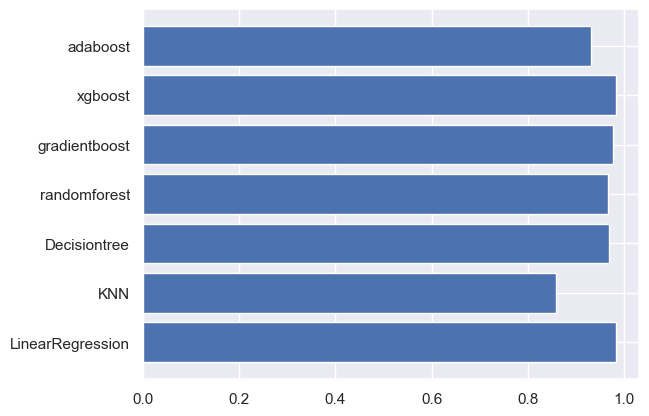

In [247]:
plt.barh(Model_s_evaluation["Regressor Models"],Model_s_evaluation["r square"])